# Capstone Project: By Default-Prediction of Credit Card Fraud

# Problem Statement:


A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies recognize fraudulent credit card transactions so that customers are not charged for items they did not purchase. 

# Data Source and Dataset Description:

he dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where 492 frauds out of 284,807 transactions were identified. The dataset has got the following features:

* V1, through to V28 (28 features): Represent the continous variables a credit card transaction recorded over the two days.
* Amount: respresents the credit card amount transacted.
* Time: represents the time a credit card transaction was executed across the two days.
* Class: this represents the target feature (binary classes where 0 respresents safe credidt card transactions while 1 represents fraudulent credit card transactions).

Hence, dataset containing 31 features whereby 30 being explanatory features.

# Loading of Dataset

Since dataset was provided by KnowledgeHut upGrad and saved in my local environment, data loading was made using the file path as shown on the df_data loading. After loading the dataset given that is a huge set, is sampled to get a small sample, which may be uploaded for public channels like GitHub where may be upscaled later.

In [1]:
# Importing Important Libraries:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_data = pd.read_csv(r'C:\Users\user\Documents\Others\Home\Trainings\Data_Science_Course\Knowledge_Hut_BootCamp\Data Scientist Bootcamp_capstone_project\final_project_docs\02_dataset\sampledcreditcard.csv')

In [3]:
df_data.shape

(16000, 31)

Getting a Sample dataset for easy loading on Github and other channels where only limited file sizes allowed.

In [4]:
# Numpy and Pandas libraries are key:

import pandas as pd
import numpy as np

# Setting the number of samples
n_samples = 16000

# Randomly sample 8,000 rows from the original DataFrame
sample_data = df_data.sample(n=n_samples, random_state=42)

# Reset the index of the new DataFrame
sample_data = sample_data.reset_index(drop=True)

Saving the sampled file in the local machine

In [5]:
# Checking for class distribution (imbalance)
class_counts = df_data['Class'].value_counts()
print(class_counts)

Class
0    15979
1       21
Name: count, dtype: int64


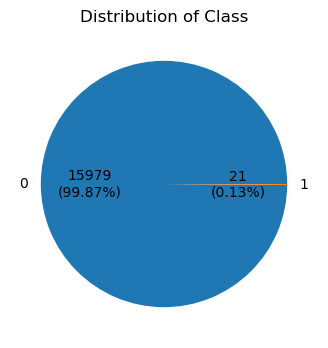

In [6]:
# Plotting to visualize how dataset is imbalanced after Sampling:Pie Chart:

# Defining a function
def f1(x):
  total = sum(df_data['Class'].value_counts().values)
  val = (x*total)/100
  return '{:.0f}\n({:.2f}%)'.format(val, x)

plt.figure(figsize = (4,4))
data = df_data['Class'].value_counts()

plt.pie(data, labels = data.index, autopct = f1, textprops= {'fontsize':10})
plt.title('Distribution of Class')
plt.show()

To optimize the predictive power of the Machine Learning classifier, it's important that dataset is treated to handle the imbalanced classes [0 and 1] of the 'Class' feature, which the machine learning Model to be build will be predicting for whether is a 0 (clean/safe credit card transaction) or a 1 (fraudulent credit card transaction).

# X and y Splitting

The imbalanced dataset handling starts immediately before the Exploratory Data Analysis (EDA) so that the imbalance cannot be a reason for feature relationship and or statistical issues. The steps is to first separate the explanatory features ('Time', 'Amount', 'V1', 'V2', ...., 'V28') from the predicted feature 'Class' getting X and y.

In [7]:
# X, y splitting to allow handle imbalanced classes:
X = df_data.drop('Class', axis=1)  # Features
y = df_data['Class']  # Target variable

# The Synthetic Minority Over-sampling Technique (SMOTE) is preferred in handling the imbalanced dataset

SMOTE is a technique used to address class imbalance in machine learning datasets. 

Class imbalance: occurs when one class of the target variable has significantly fewer samples compared to another class, which can lead to a biased or poorly performing model. SMOTE is a popular method for addressing this issue as explained below:

Identify the Minority Class: In a dataset with class imbalance, SMOTE focuses on the minority class.

Generate Synthetic Samples: SMOTE works by generating synthetic samples for the minority class. It does this by selecting a sample from the minority class and finding its k-nearest neighbors within that class.

Interpolation: Once the nearest neighbors are identified, SMOTE creates synthetic samples by interpolating between the selected sample and its neighbors. The synthetic samples are created by selecting a fraction of the distance between the selected sample and each of its neighbors.

Balance the Classes: By generating synthetic samples for the minority class, SMOTE helps balance the class distribution. This makes the dataset more balanced and prevents the model from being biased toward the majority class.

SMOTE is particularly useful in situations where collecting additional data for the minority class is challenging or expensive. It helps improve the performance of machine learning models by reducing the bias introduced by class imbalance.

After Experimenting both the Undersampling and OverSampling Methods/techiniques, it turned out that SMOTE was working well on the model performance, hence chosen.

# Setting Up the Environment for SMOTE to Effectively Work

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Just in case the above installation did not whork
!pip install -U imbalanced-learn

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Upgrading imbalanced-learn
!pip install --upgrade imbalanced-learn scikit-learn

In [10]:
# Installing sklearn
!pip install sklearn

In [11]:
# Checking for libraries availability:
import sklearn
import imblearn
print(sklearn.__version__)
print(imblearn.__version__)

1.3.2
0.11.0


In [12]:
# Explicitly Set the Number of Threads for OpenBLAS:

import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [13]:
# Updating Library

!pip install --upgrade imbalanced-learn
!pip install --upgrade threadpoolctl

In [14]:
# Explicitly Set OpenBLAS Threads within Code:

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [15]:
# Importing SMOTE: for Synthetic Minority Over-sampling Technique to Handle the Imbalanced Dataset
# (Minority Class)
from imblearn.over_sampling import SMOTE

Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution

In [16]:
# Handling imbalanced dataset df['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Recreate DataFrame after SMOTE by combining X_resampled and y_resampled using the concatenate method

In [17]:
# Concatenating resampled sets:

df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


In [18]:
df.shape

(31958, 31)

In [19]:
# Checking for class distribution after applying SMOTE in the new created DataFrame:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
1    15979
0    15979
Name: count, dtype: int64


# Verifying whether Classes are balanced

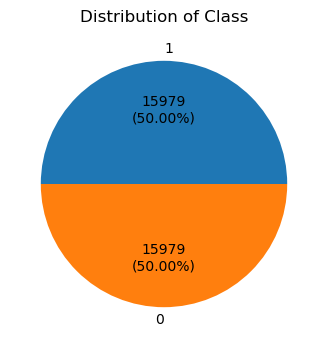

In [20]:
# Checking for imbalanced Dataset after SMOTE by Visualizing the Class (Fraud and Safe Transaction) a Pie Chart:

# Defining a function
def f1(x):
  total = sum(df['Class'].value_counts().values)
  val = (x*total)/100
  return '{:.0f}\n({:.2f}%)'.format(val, x)

plt.figure(figsize = (4,4))
data = df['Class'].value_counts()

plt.pie(data, labels = data.index, autopct = f1, textprops= {'fontsize':10})
plt.title('Distribution of Class')
plt.show()

In [21]:
# Understanding DataFrame Columns:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
import pandas as pd

# Assuming you have your DataFrame loaded as 'df'
# You can replace 'df' with the actual variable name of your DataFrame.

# Count the number of columns
num_columns = df.shape[1]

# Display the number of columns
print("Number of columns:", num_columns)

Number of columns: 31


In [23]:
# DataFrame Shape and Missing values

round((df.isnull().sum() / len(df))*100,2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

# Conducting Exploratory Data Analysis [EDA] using Sweetviz using the analyze() method

In [24]:
# Installing sweetviz Library for EDA
!pip install sweetviz

In [25]:
# Importing the library:
import sweetviz as sv

In [26]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


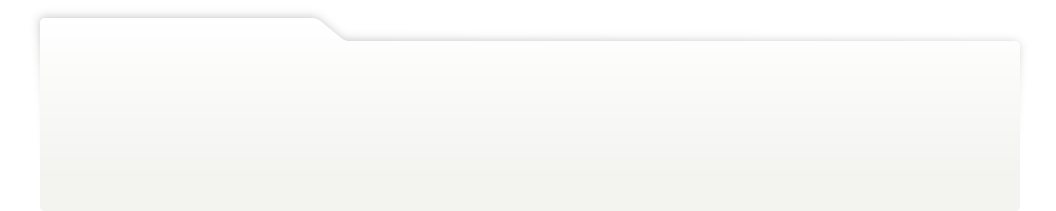
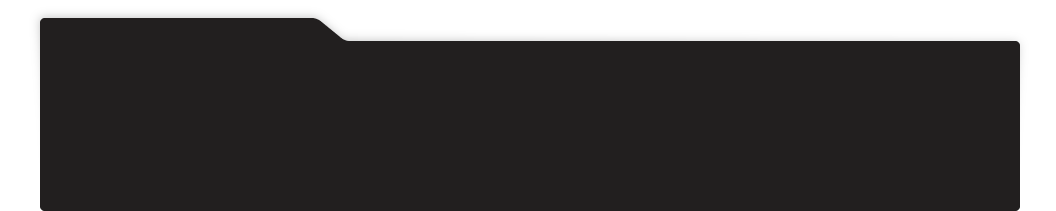
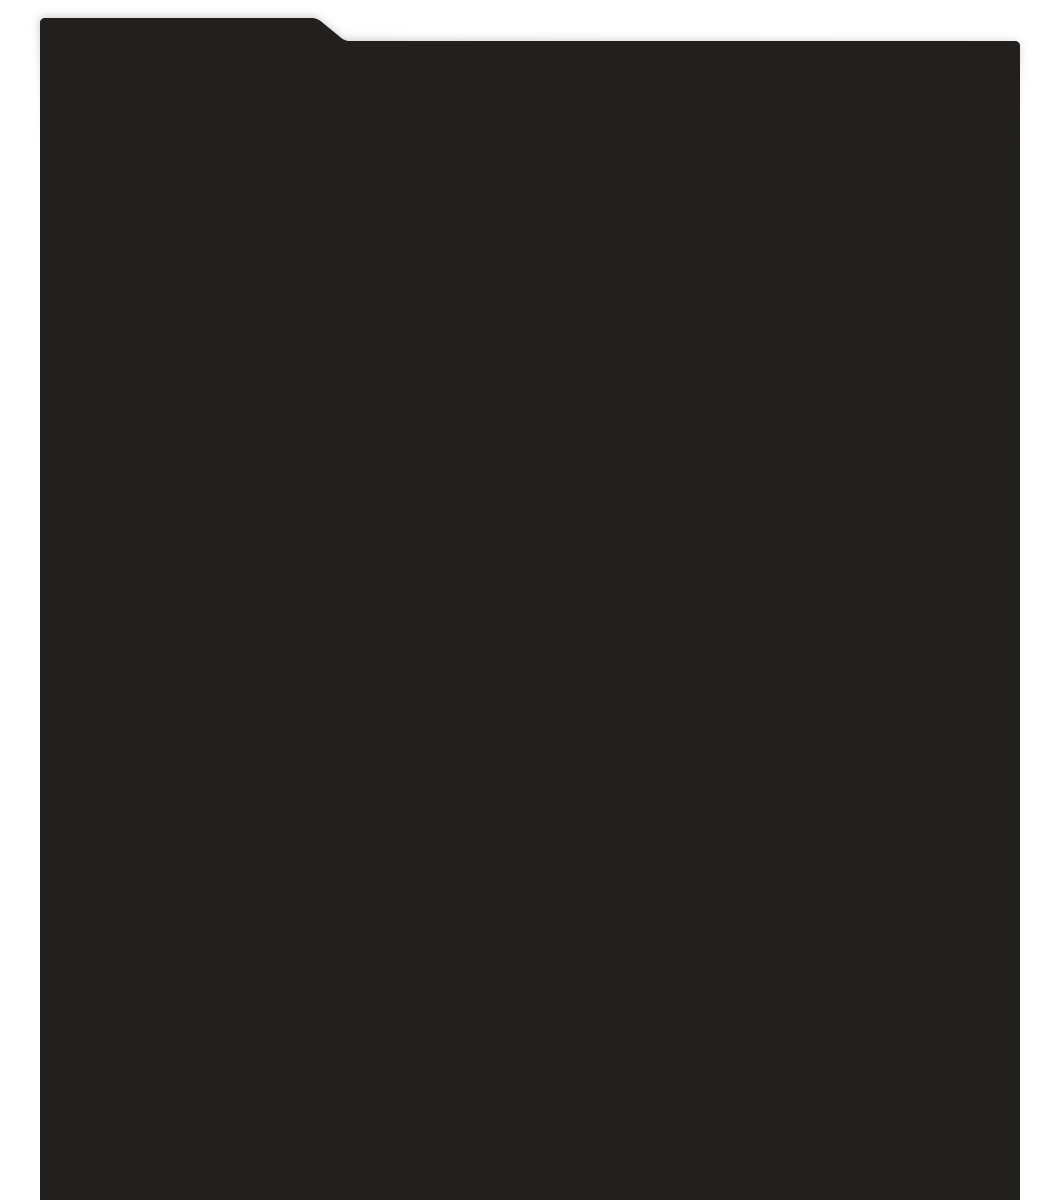
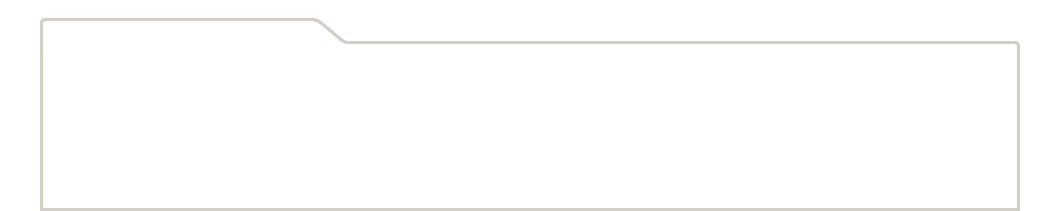
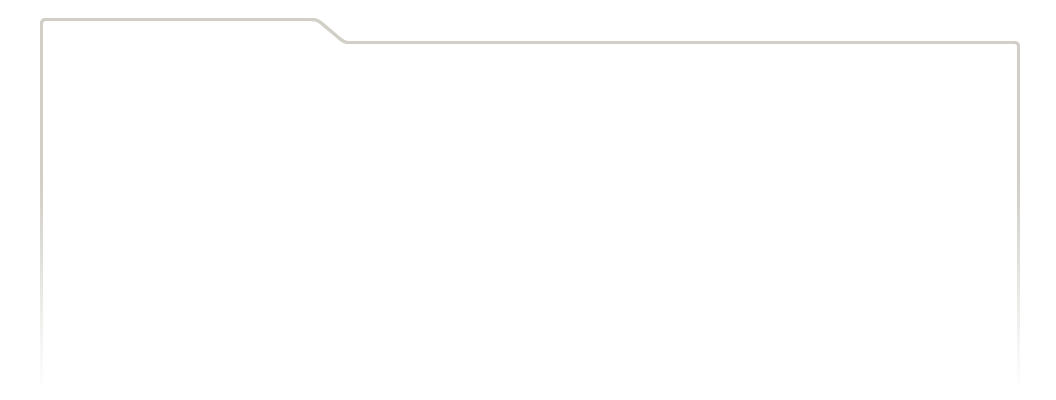
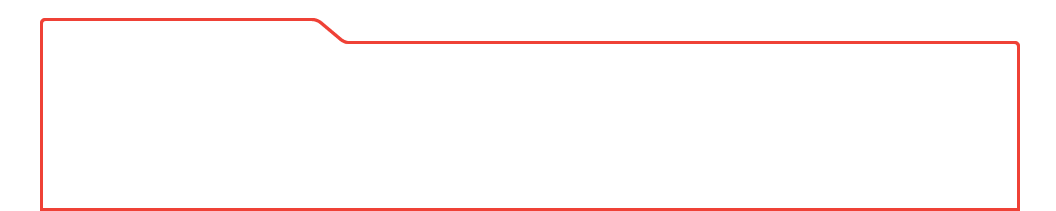
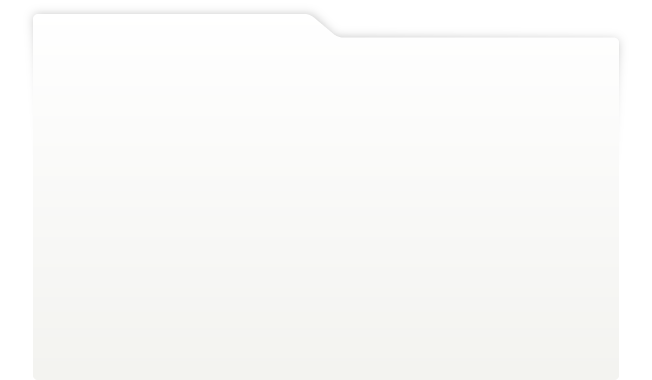
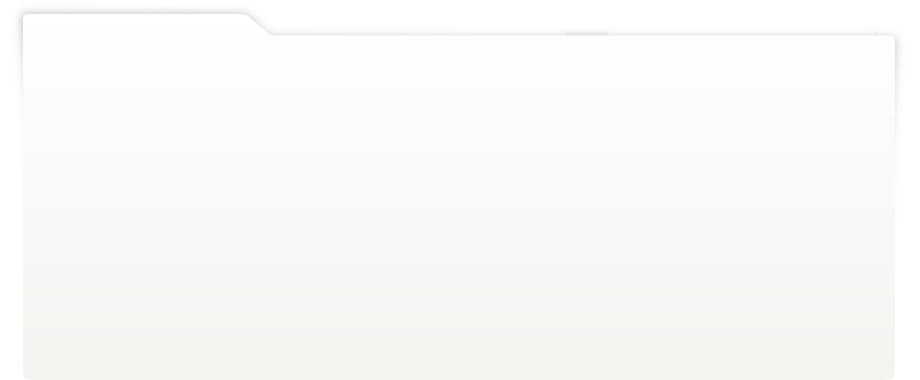
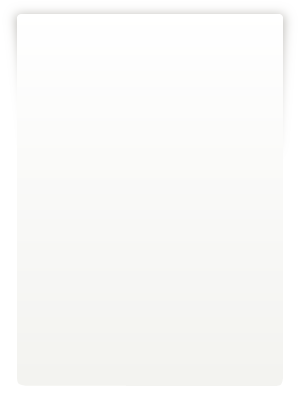
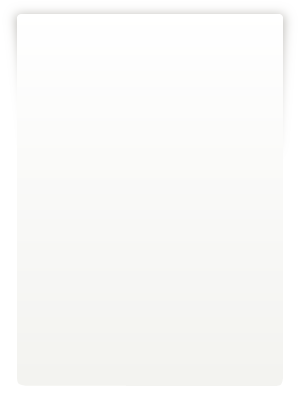
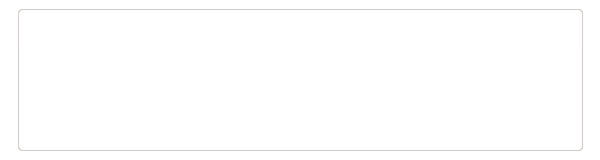
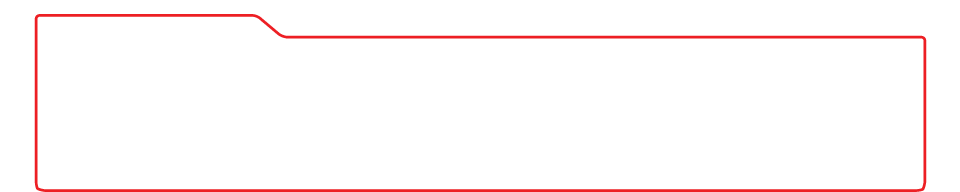
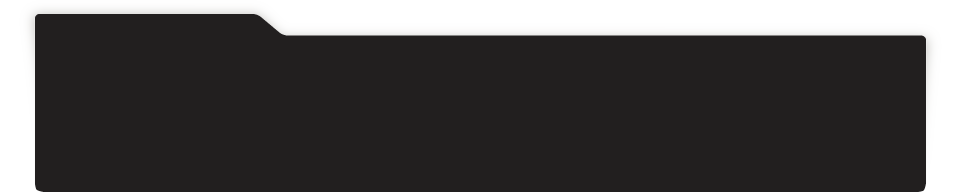
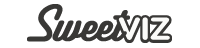
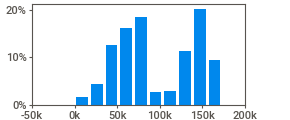
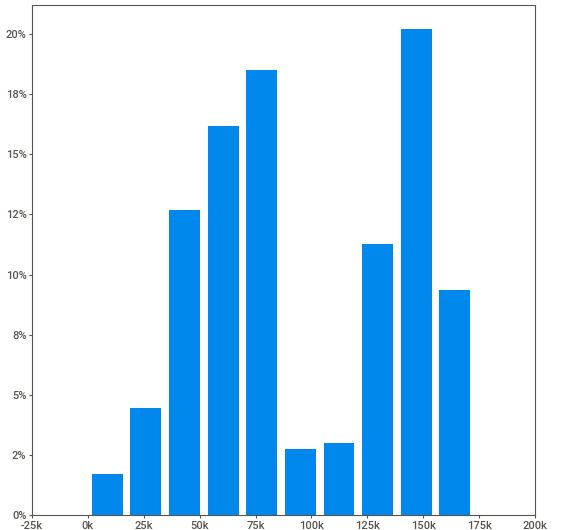
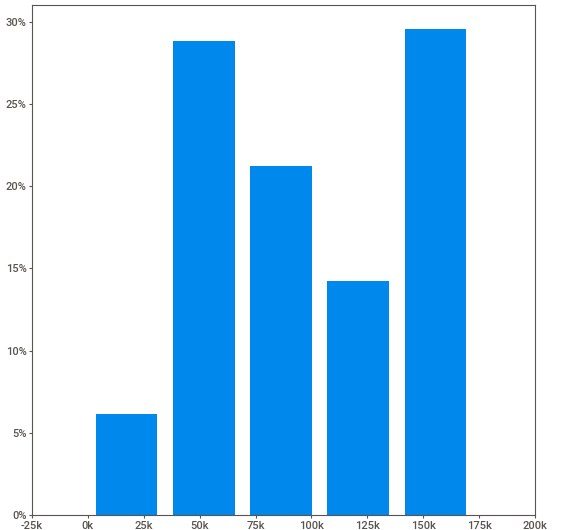
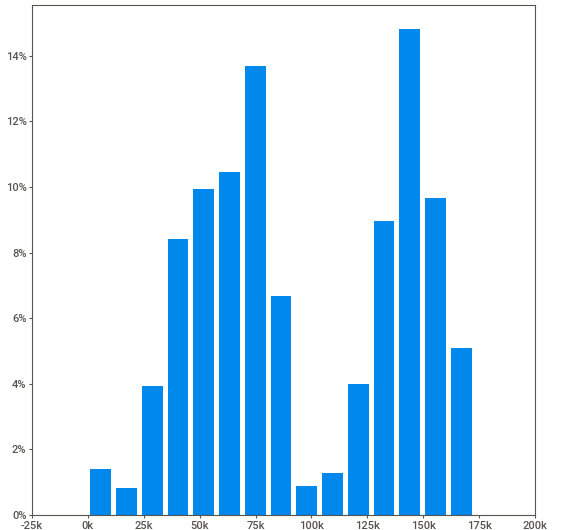
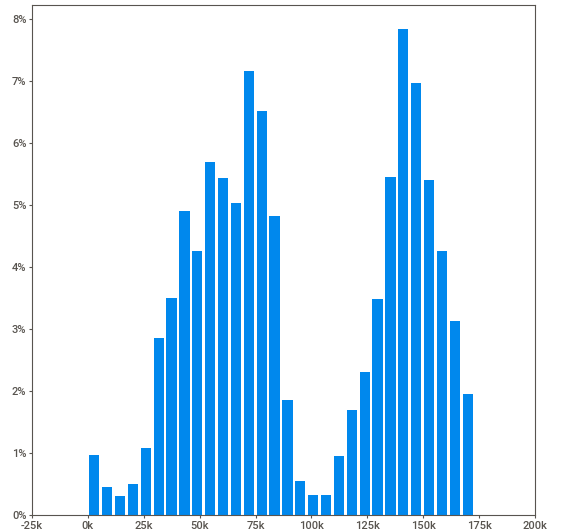
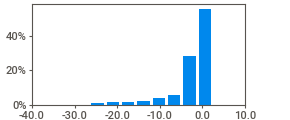
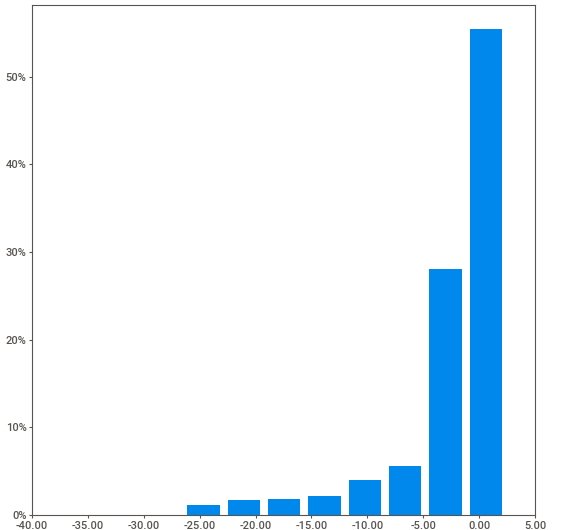
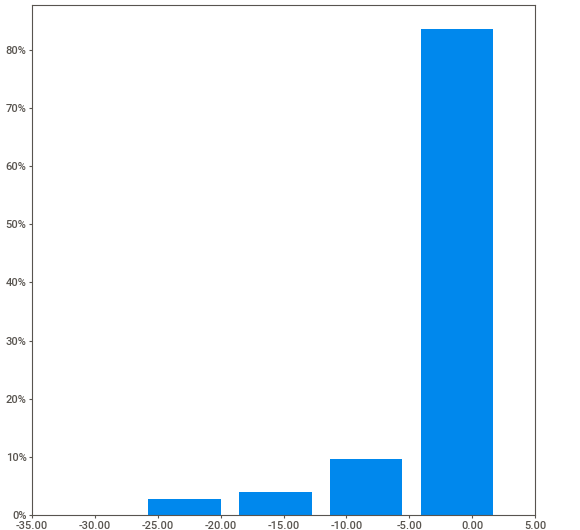
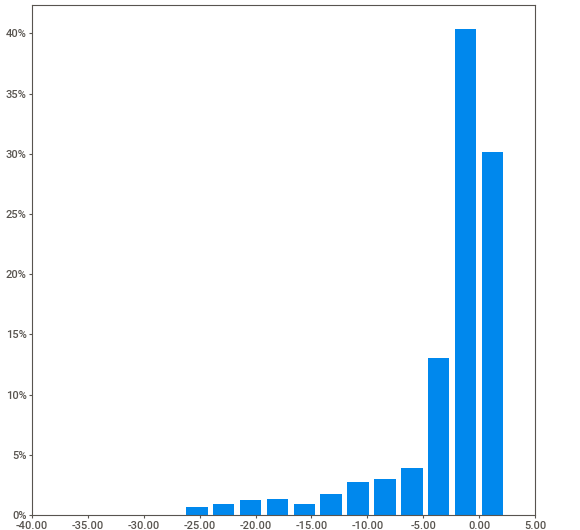
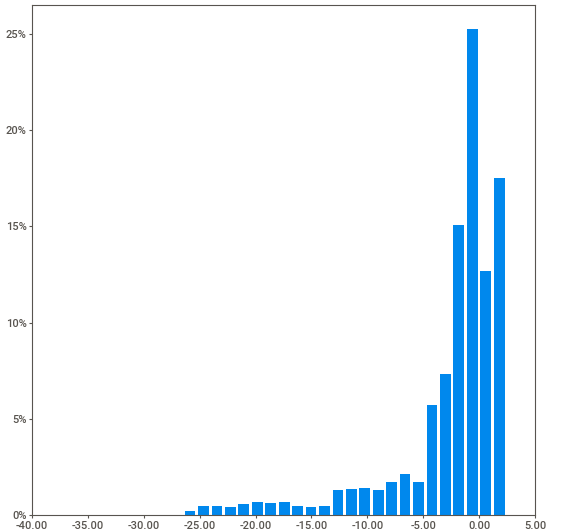
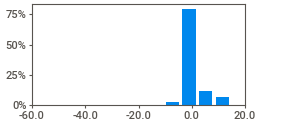
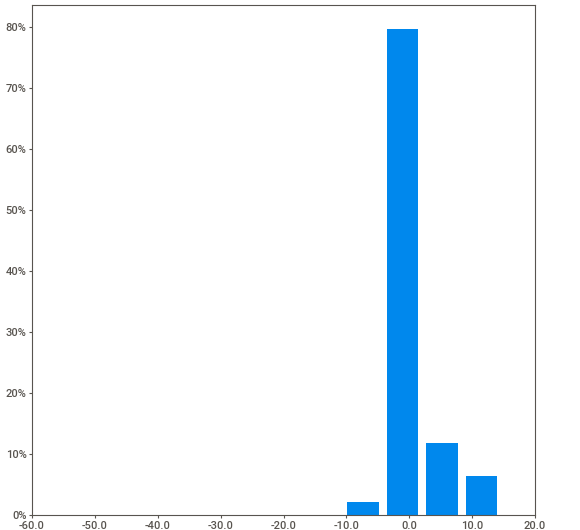
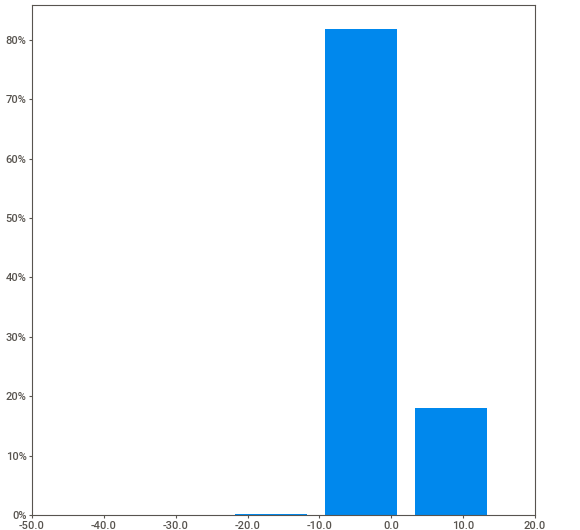
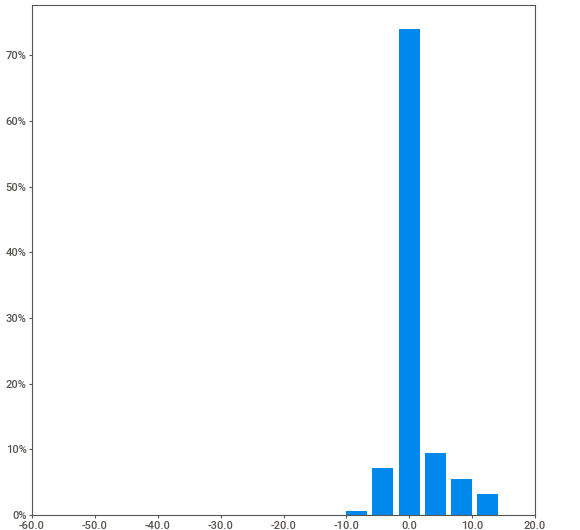
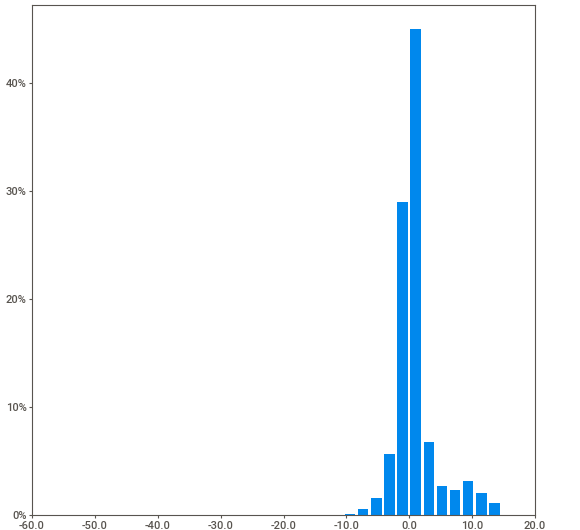
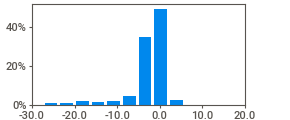
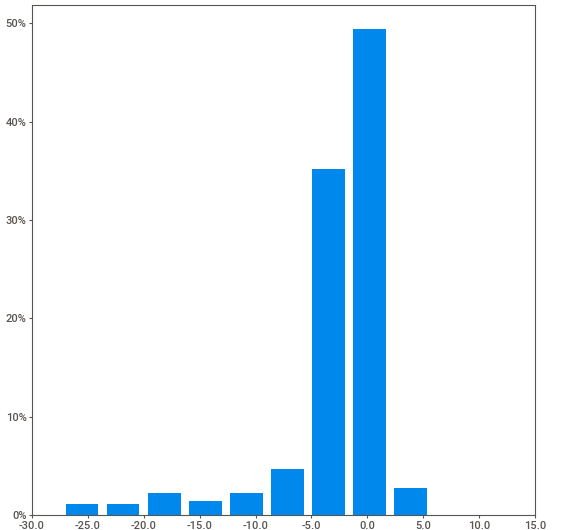
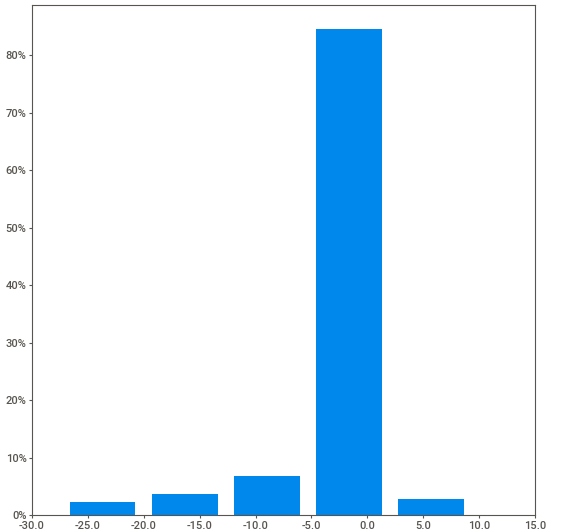
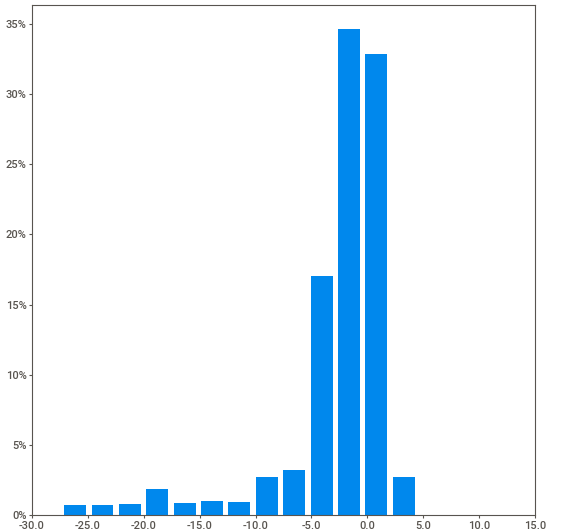
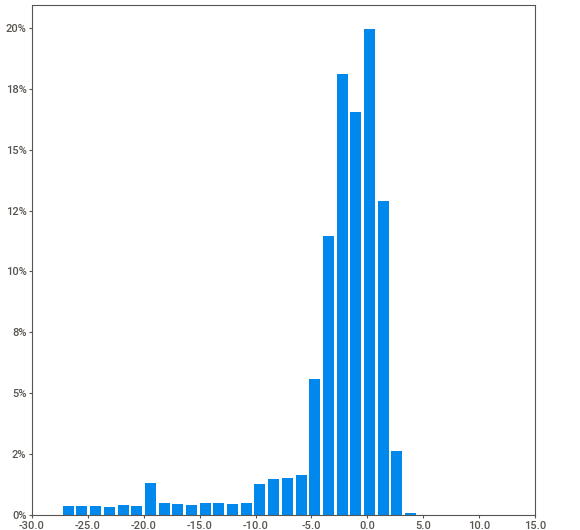
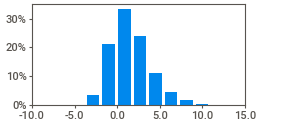
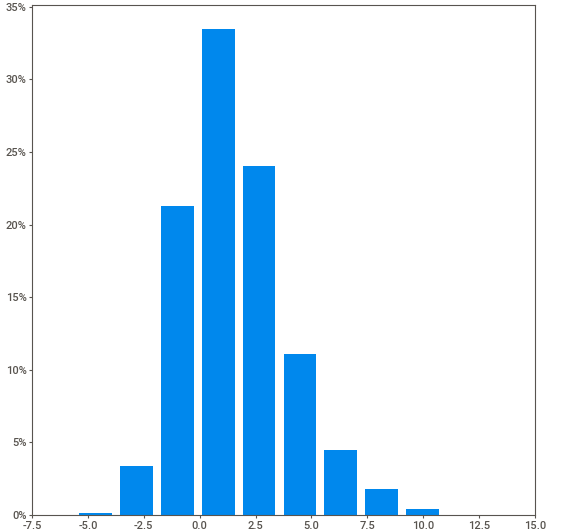
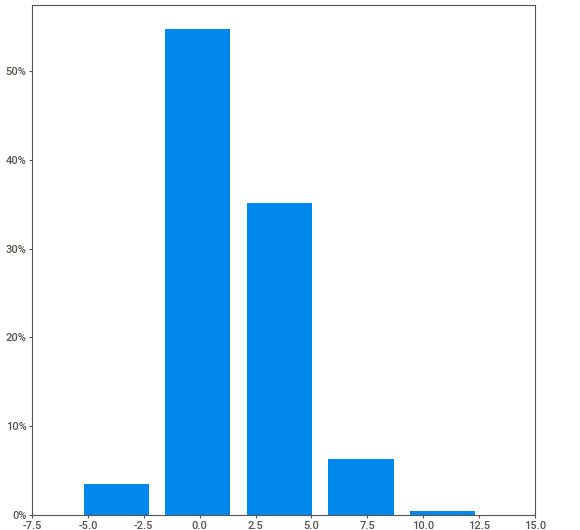
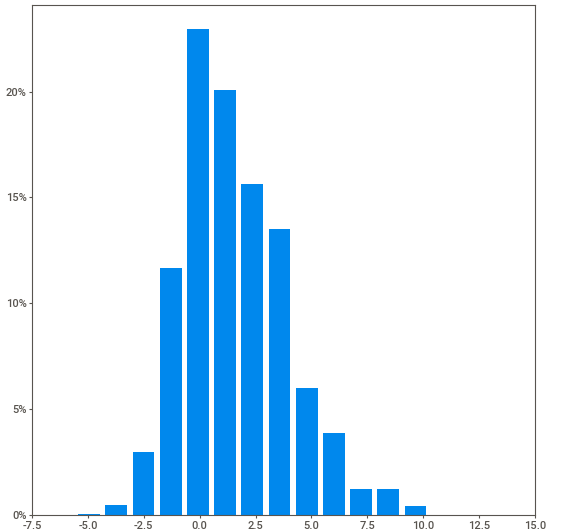
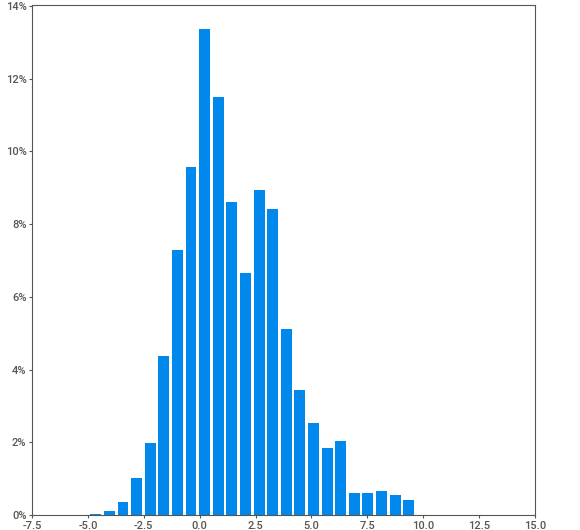
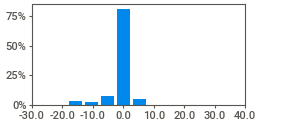
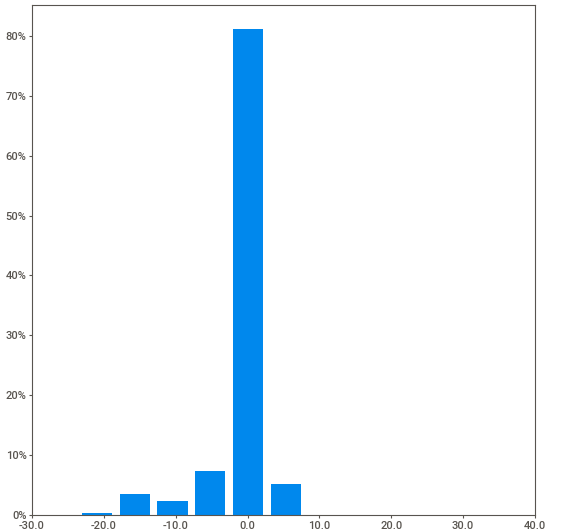
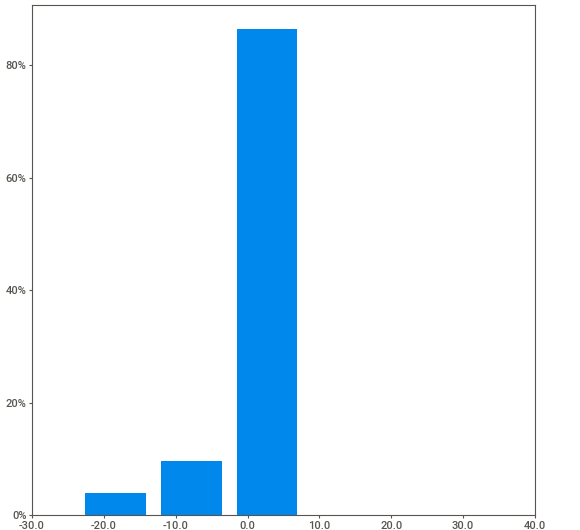
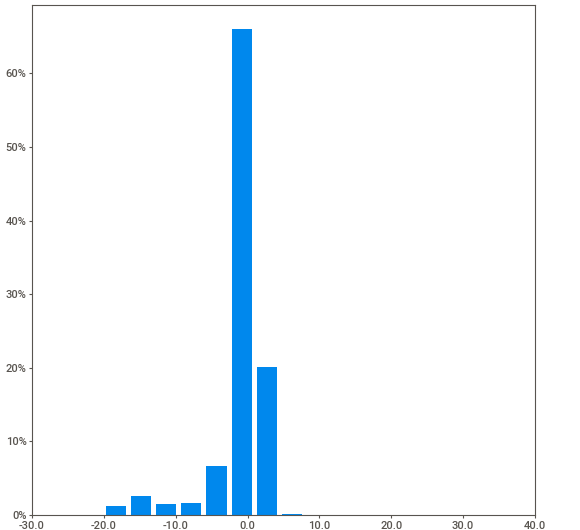
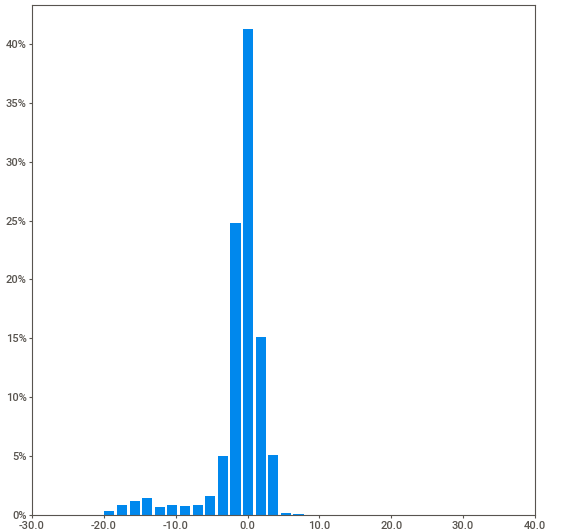
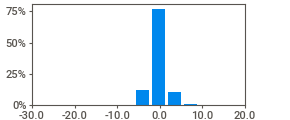
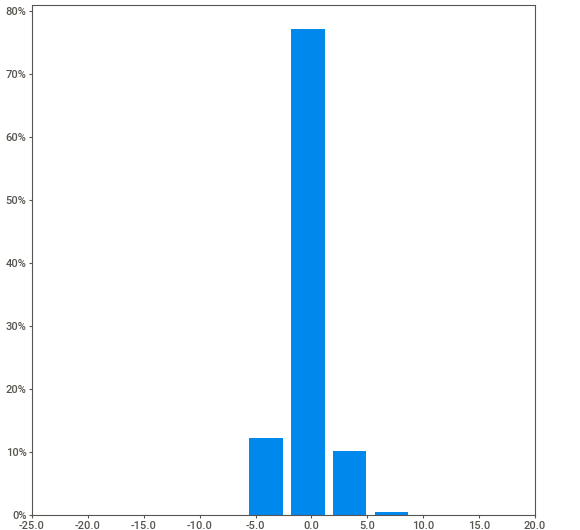
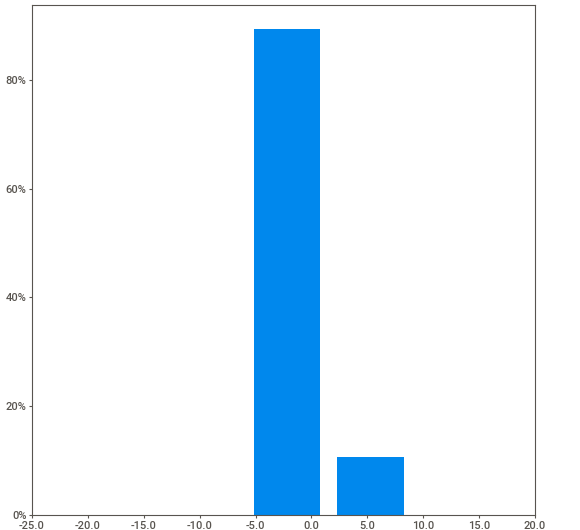
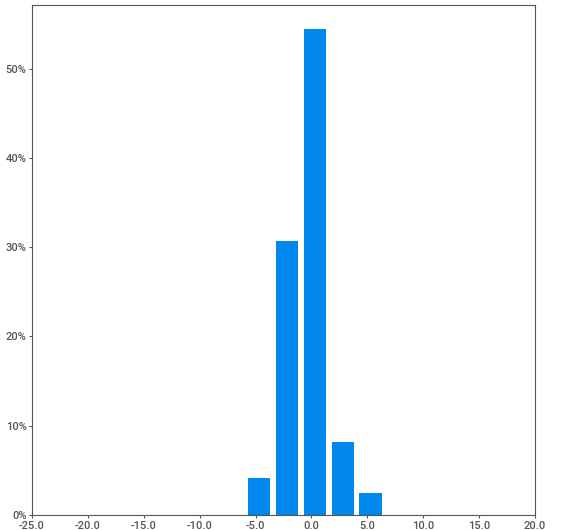
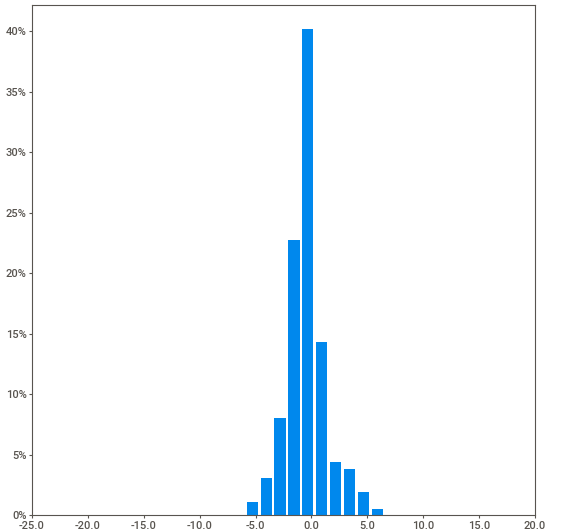
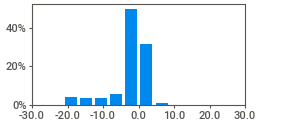
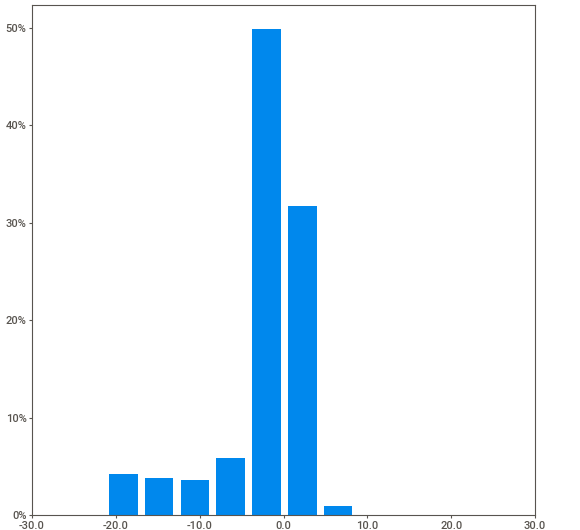
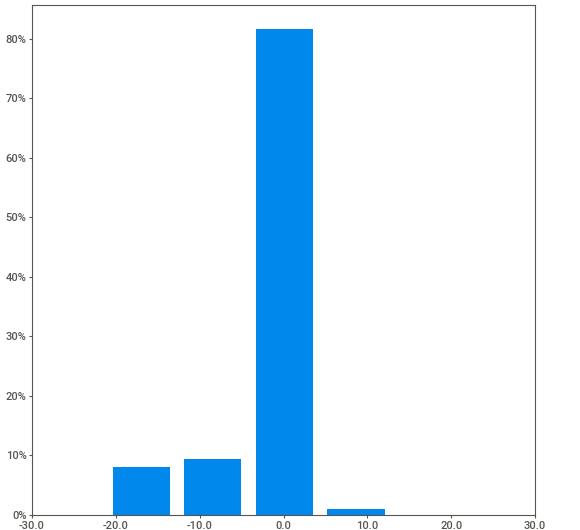
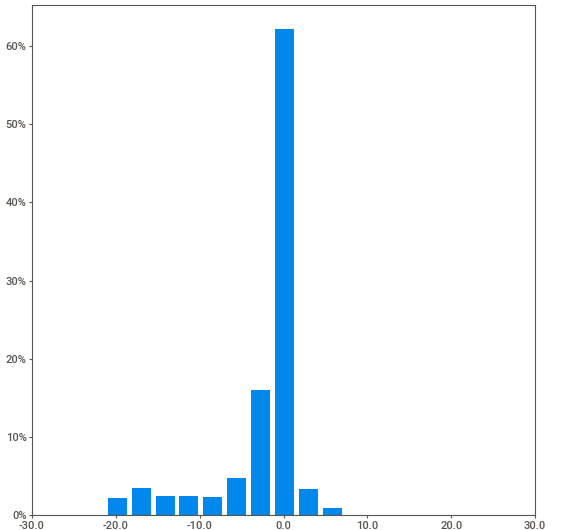
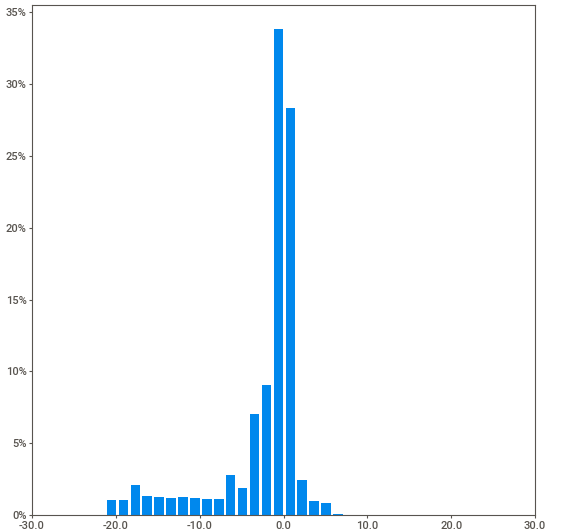
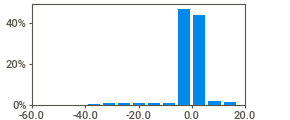
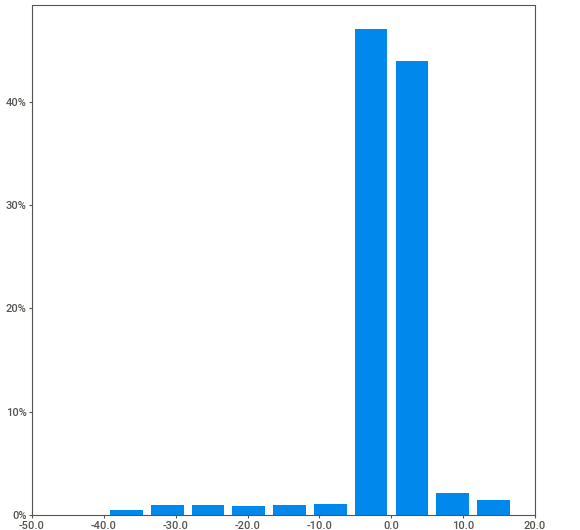
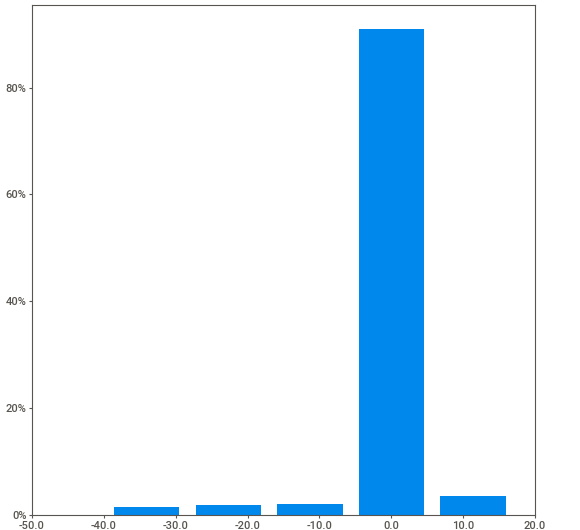
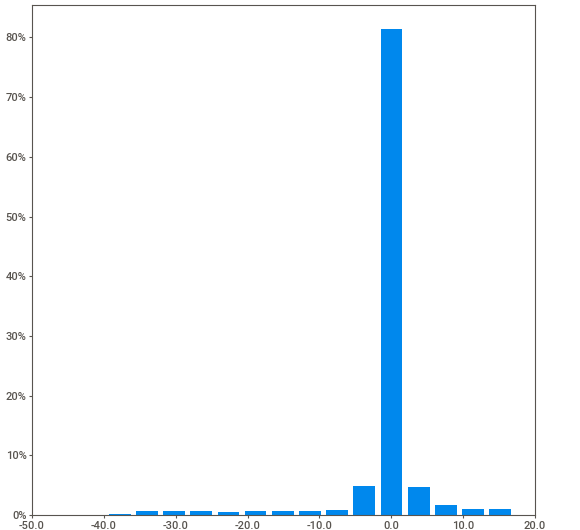
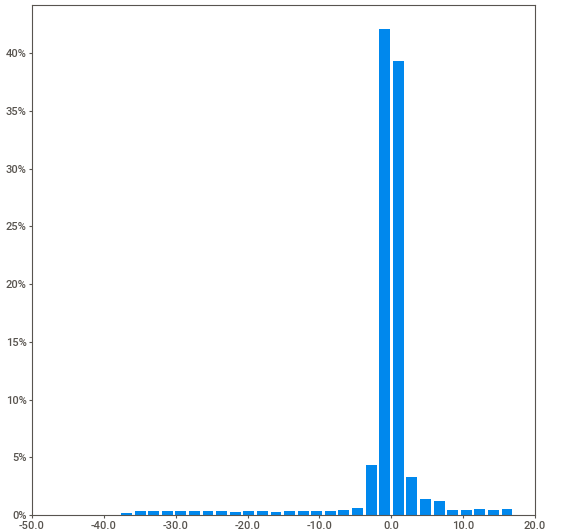
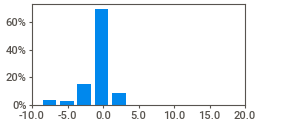
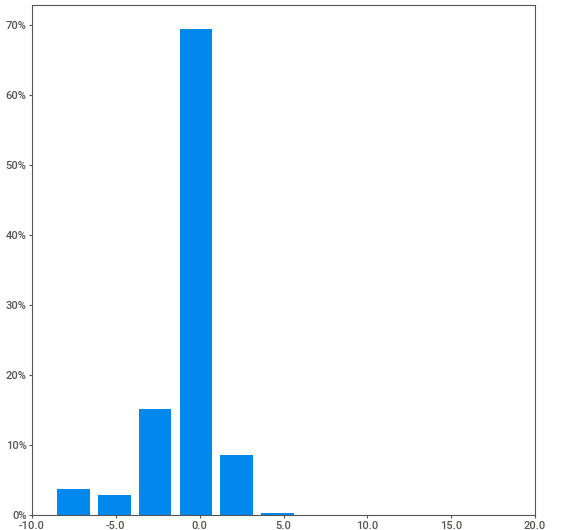
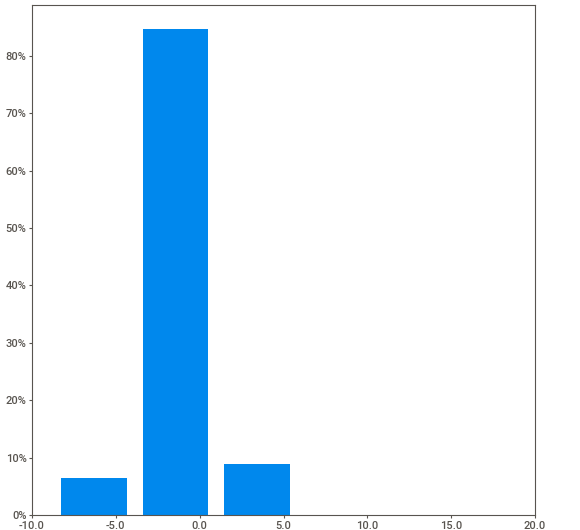
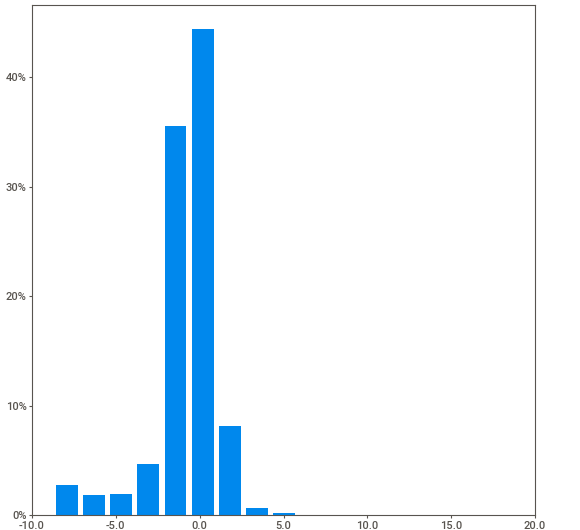
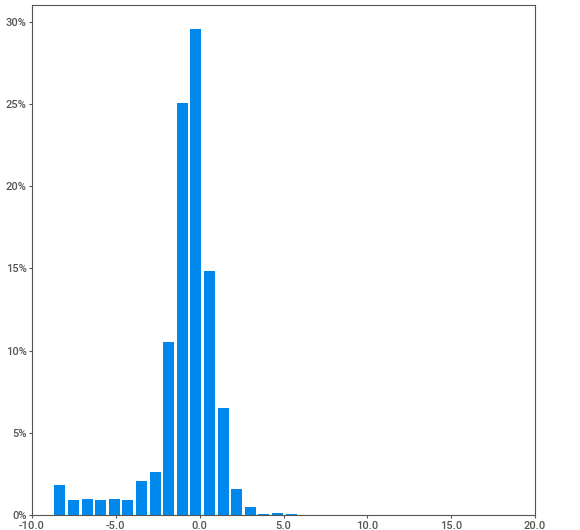
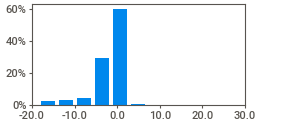
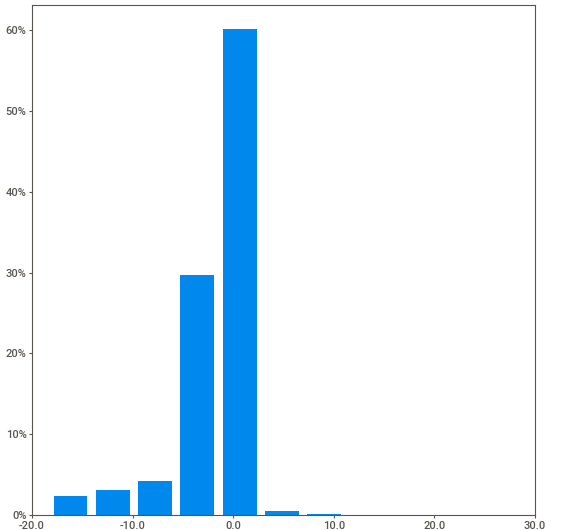
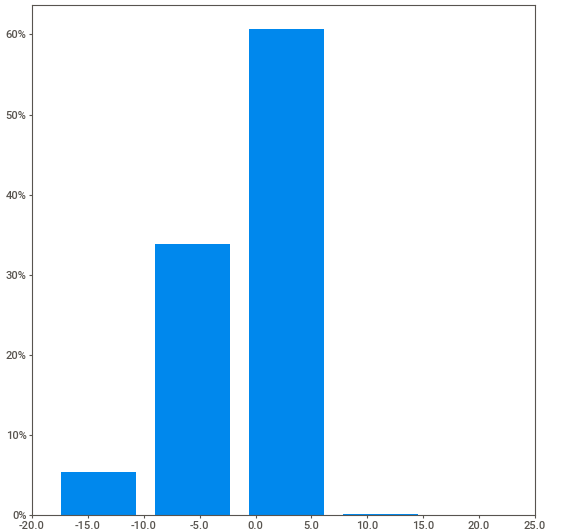
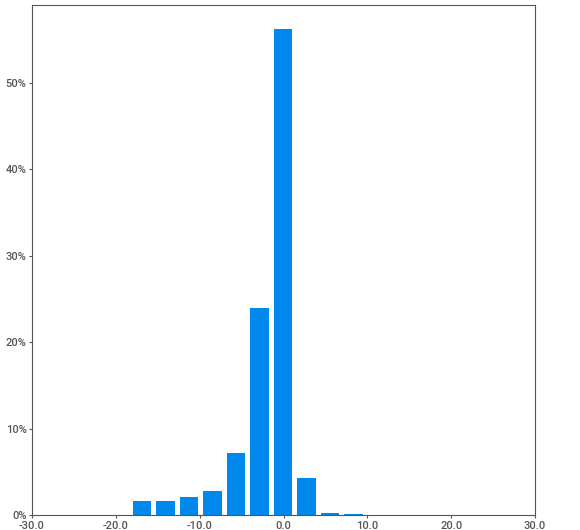
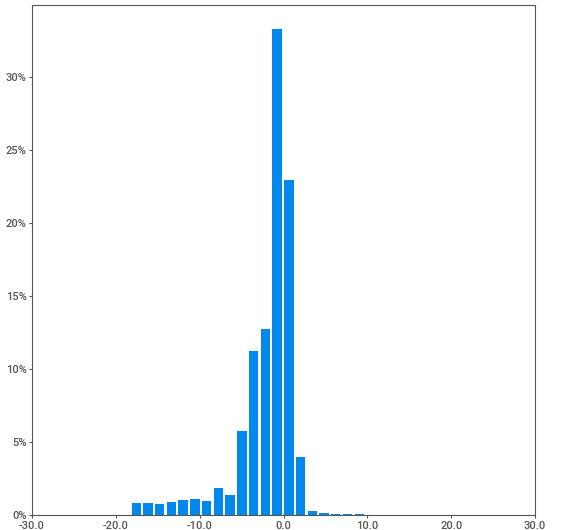
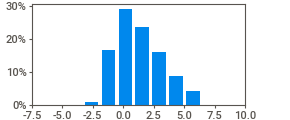
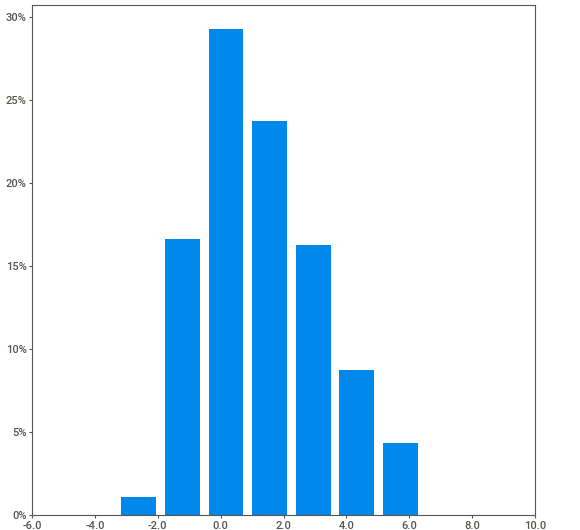
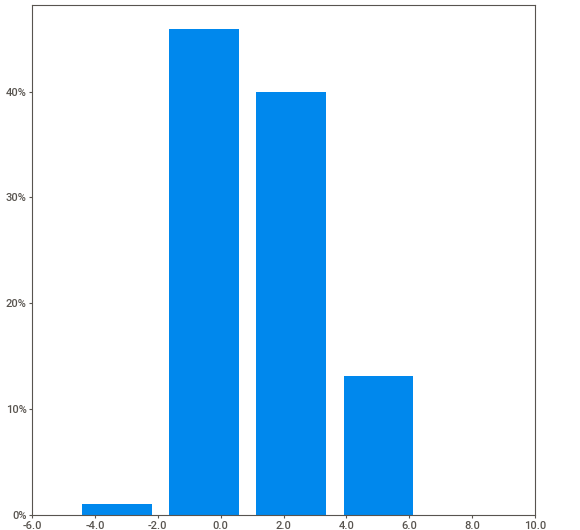
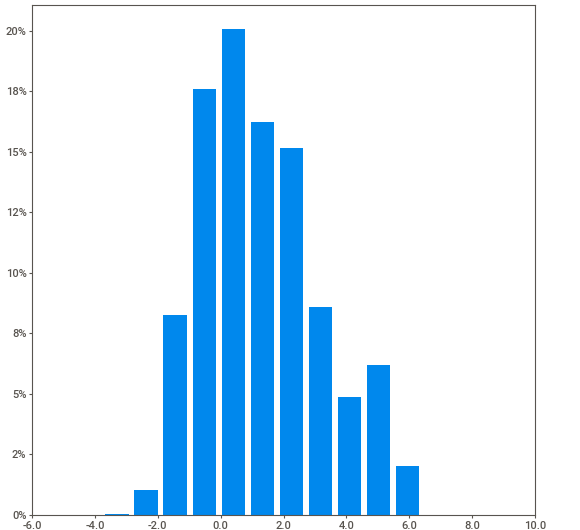
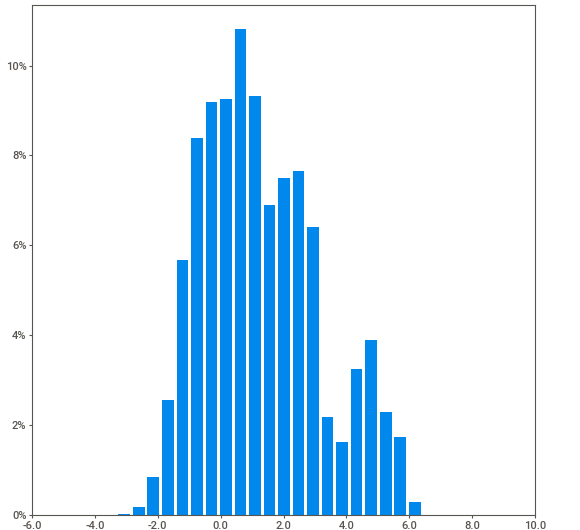
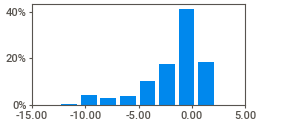
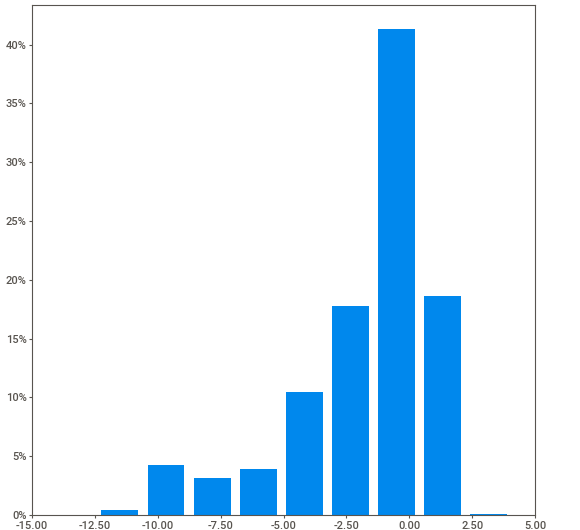
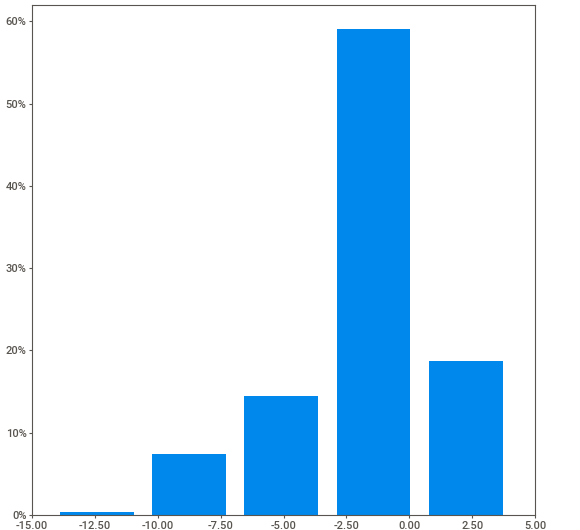
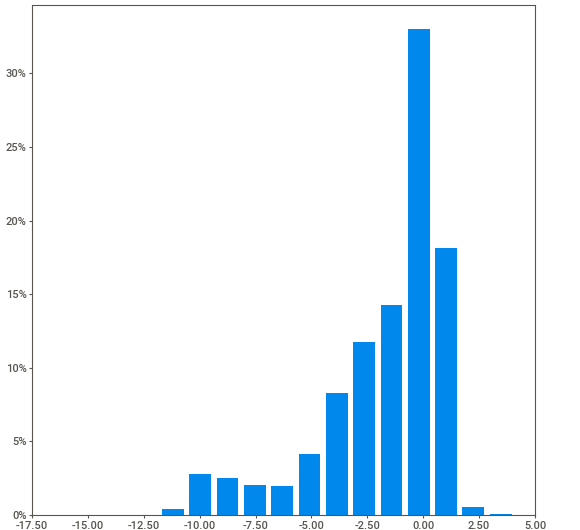
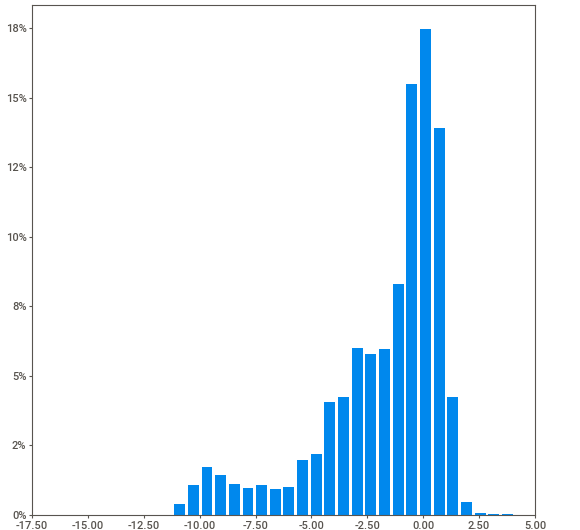
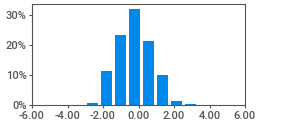
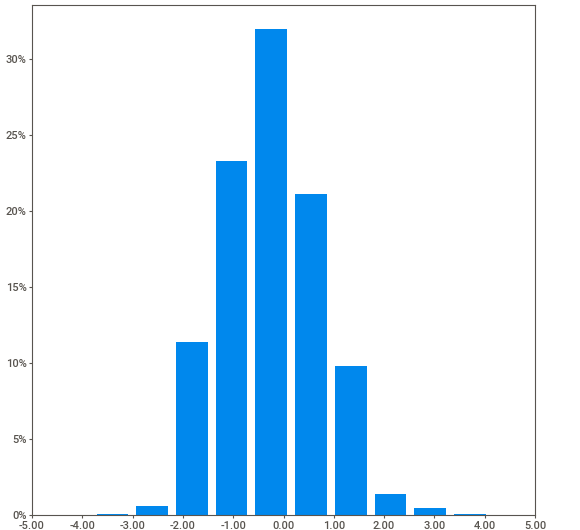
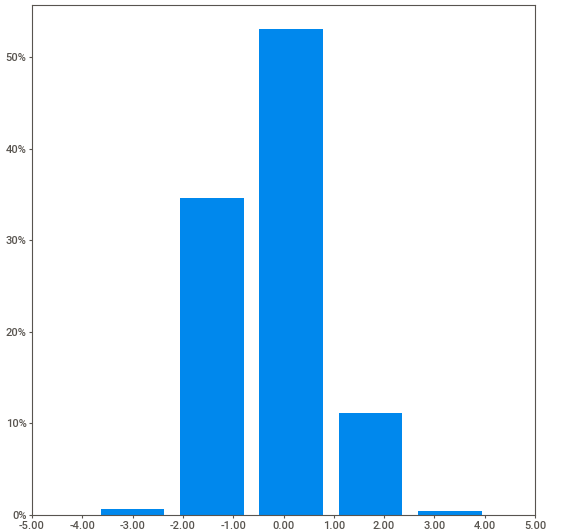
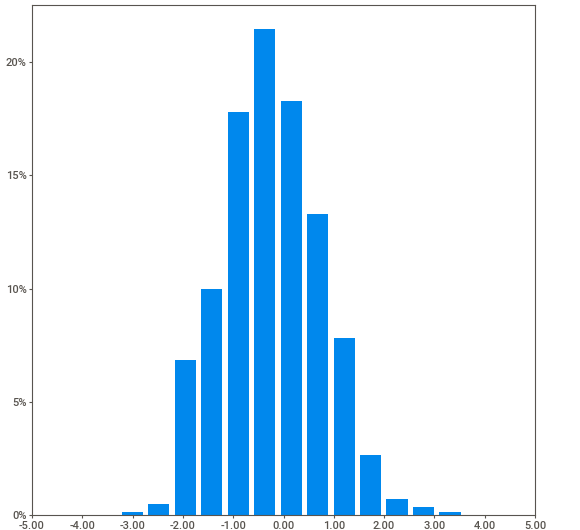
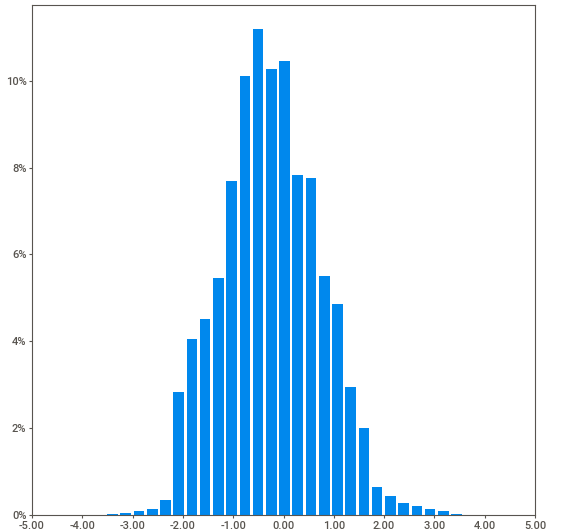
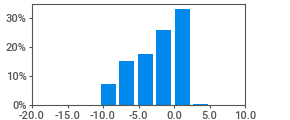
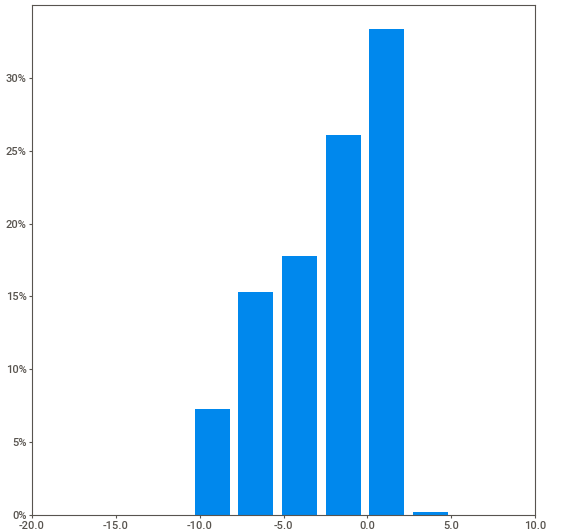
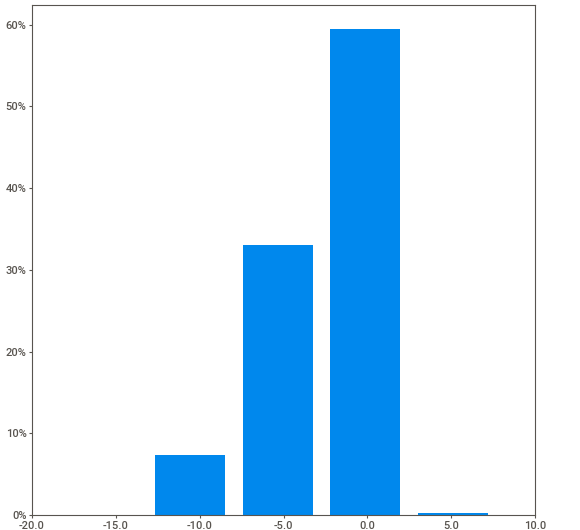
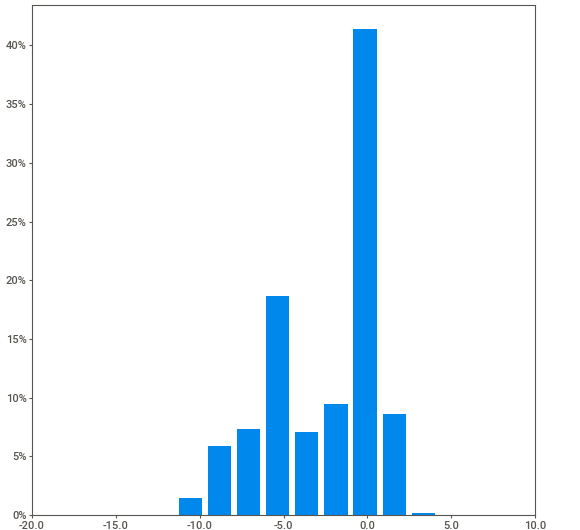
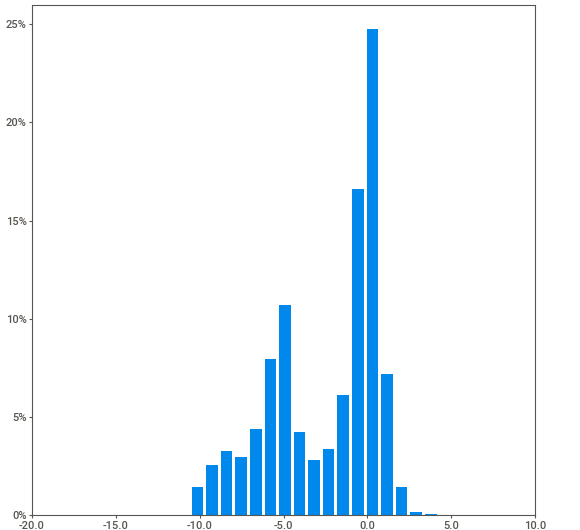
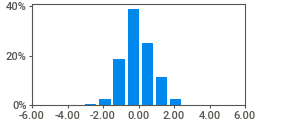
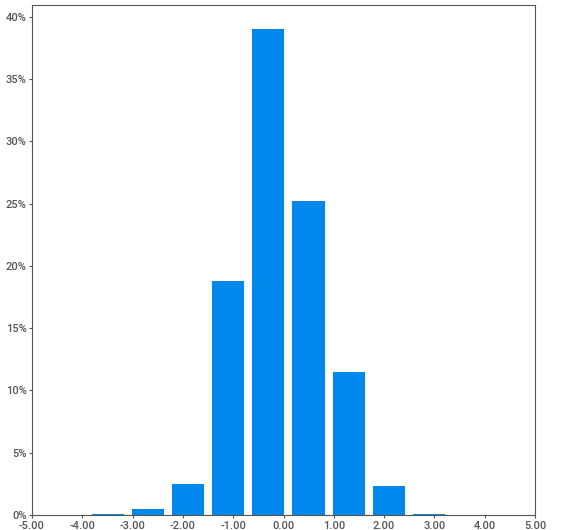
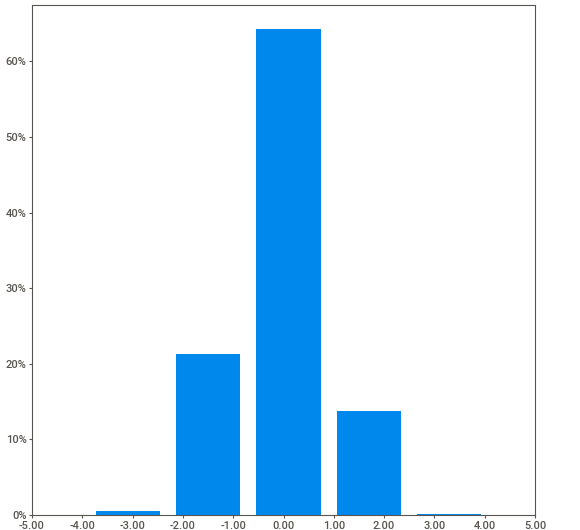
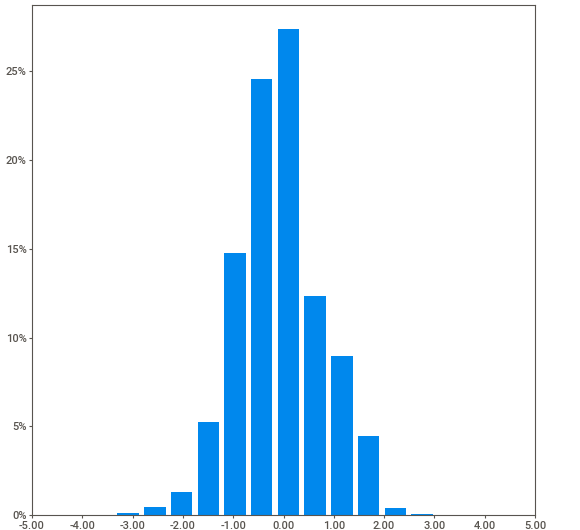
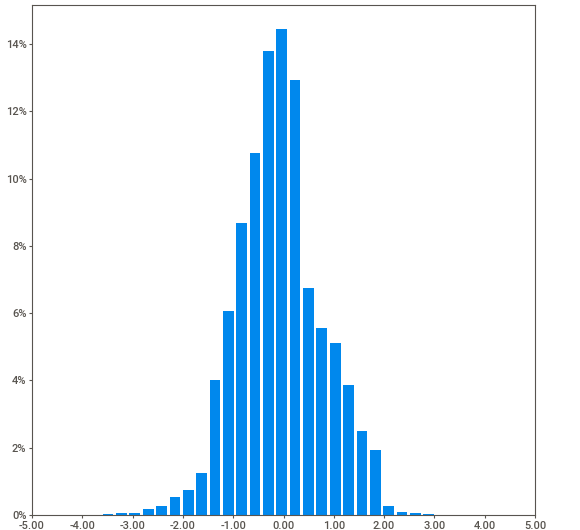
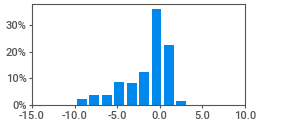
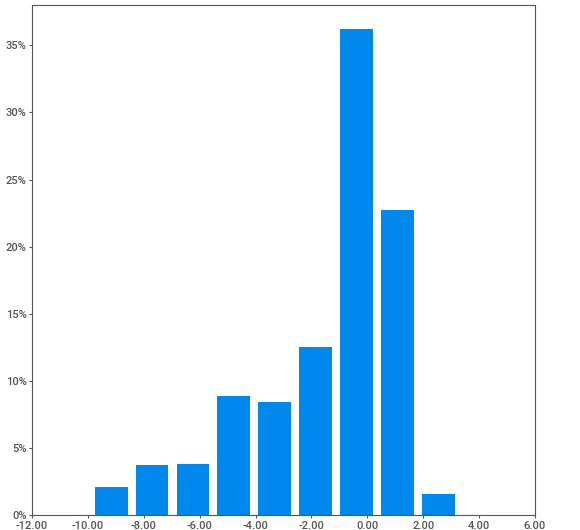
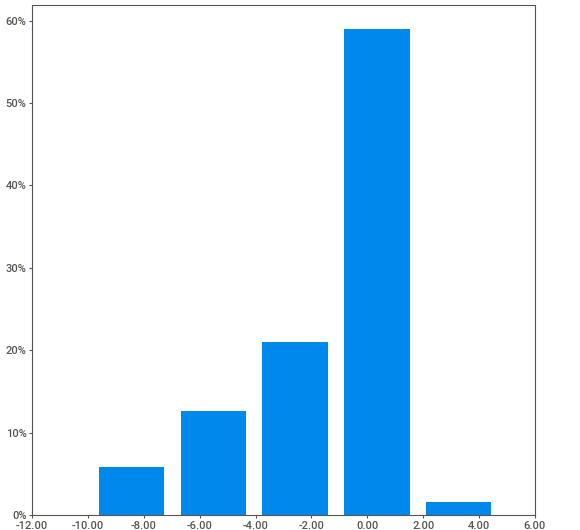
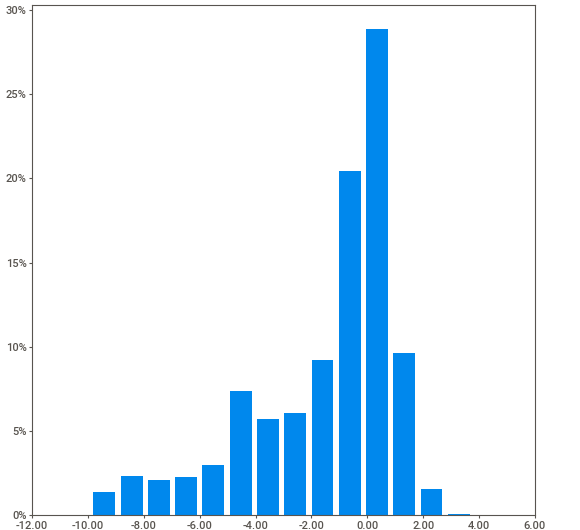
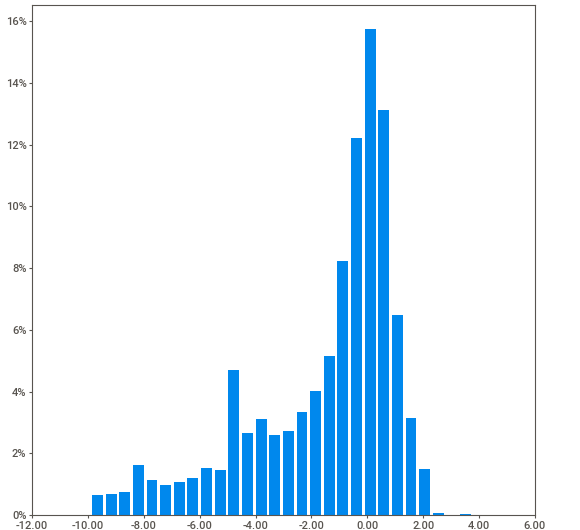
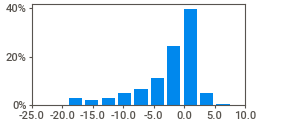
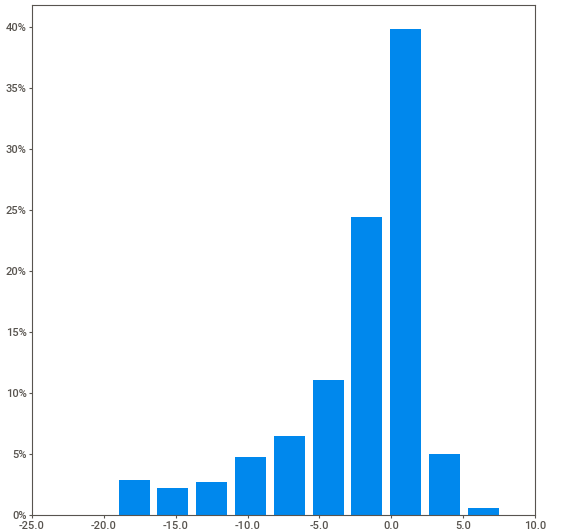
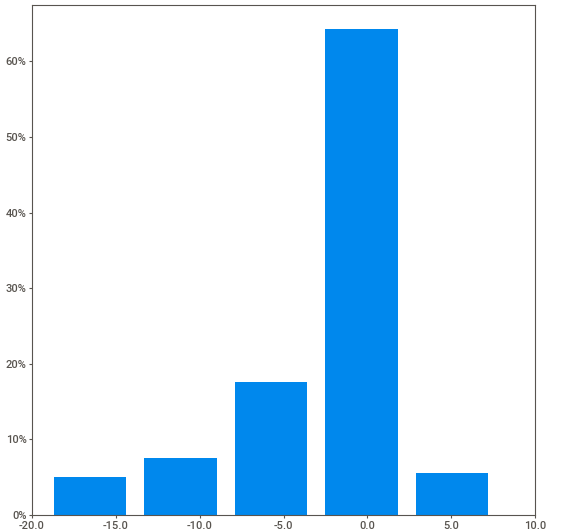
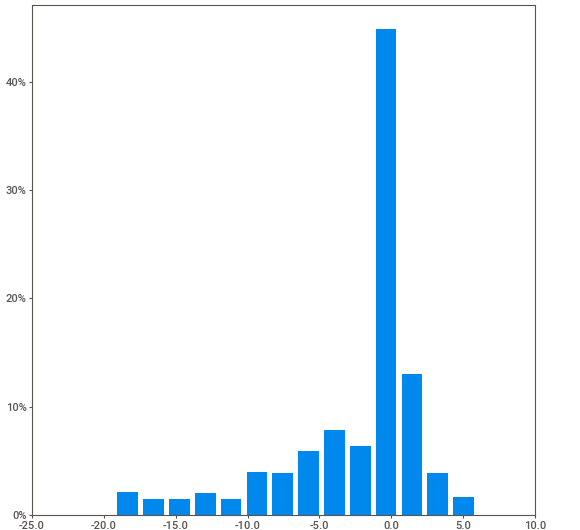
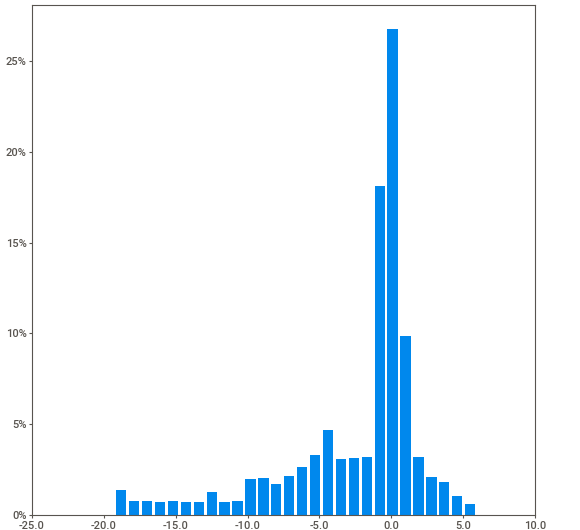
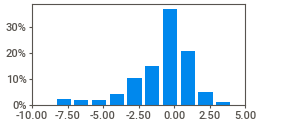
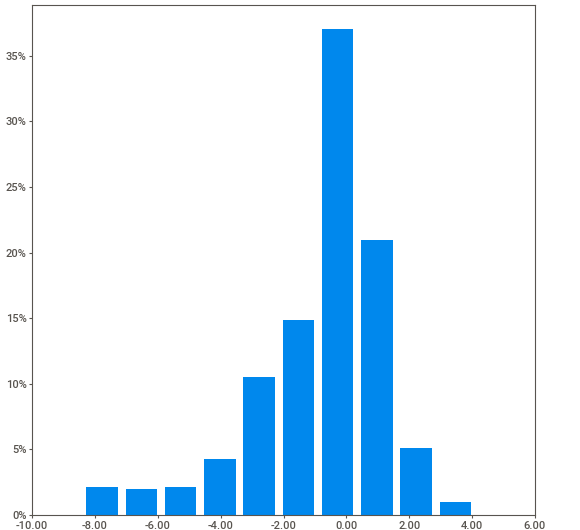
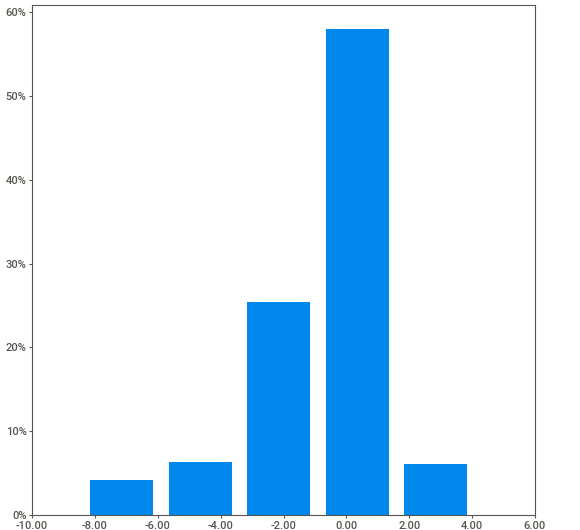
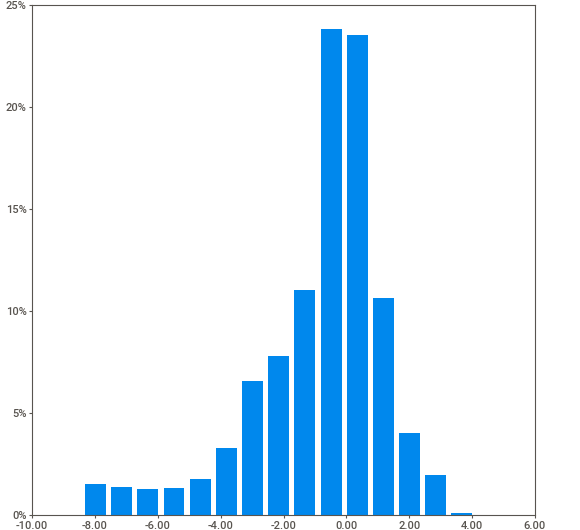
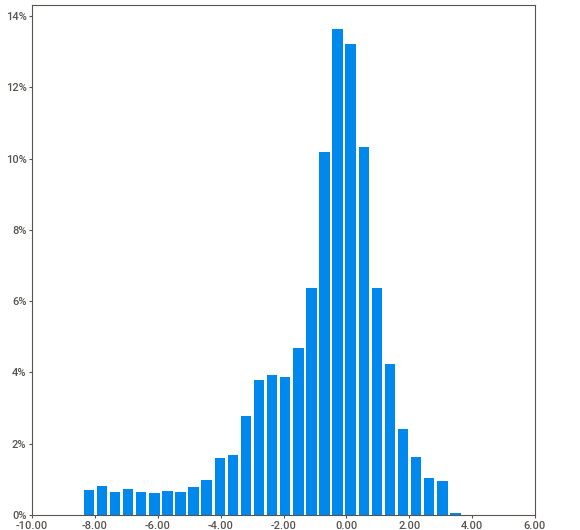
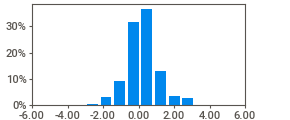
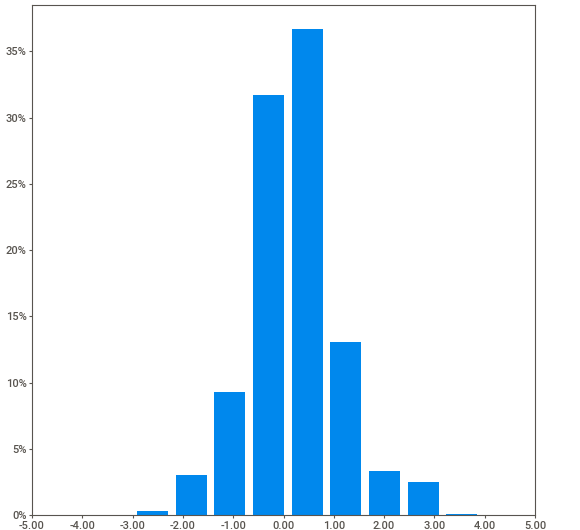
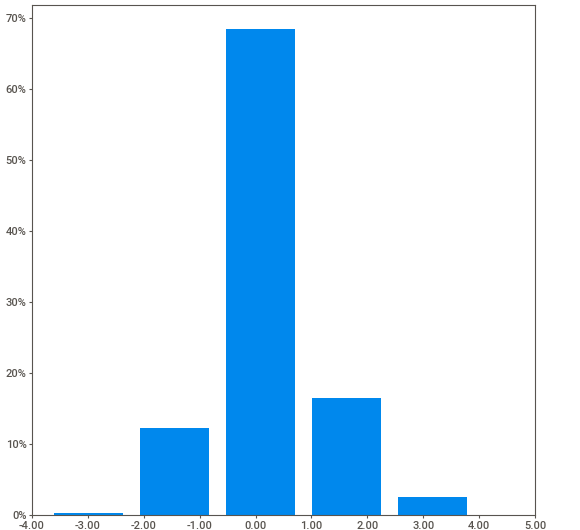
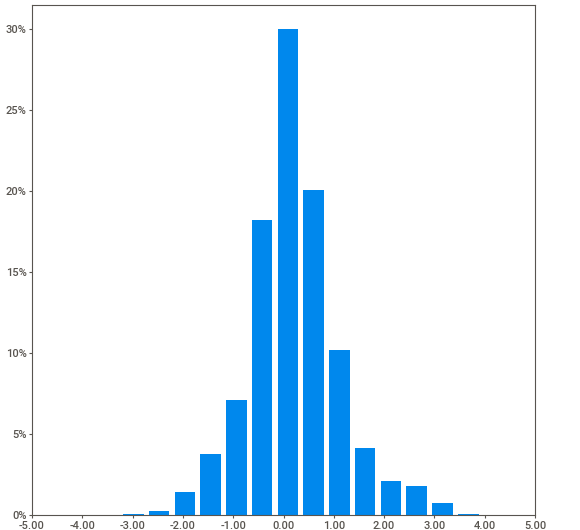
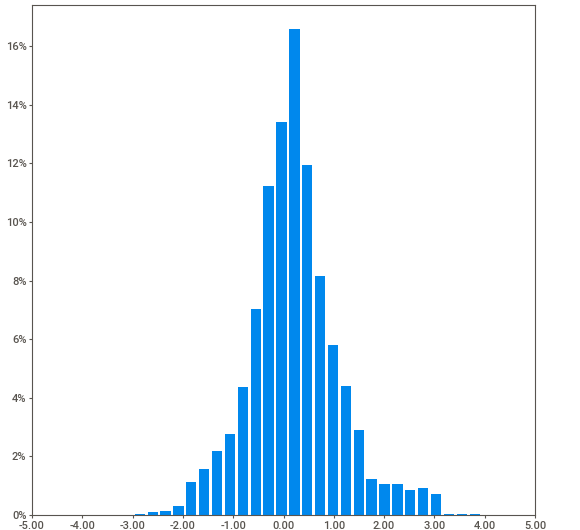
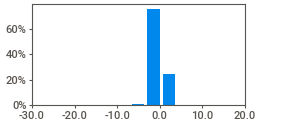
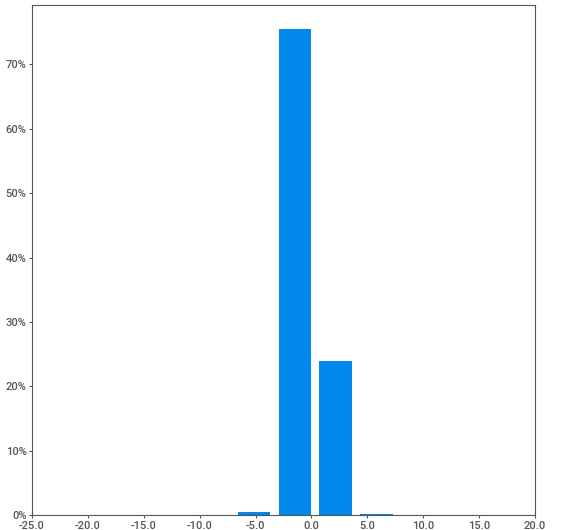
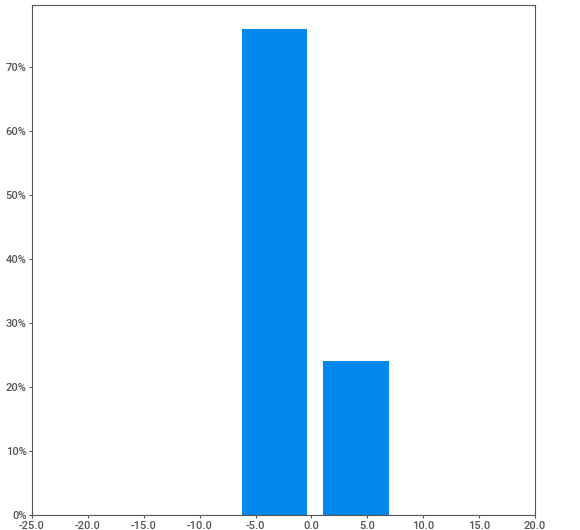
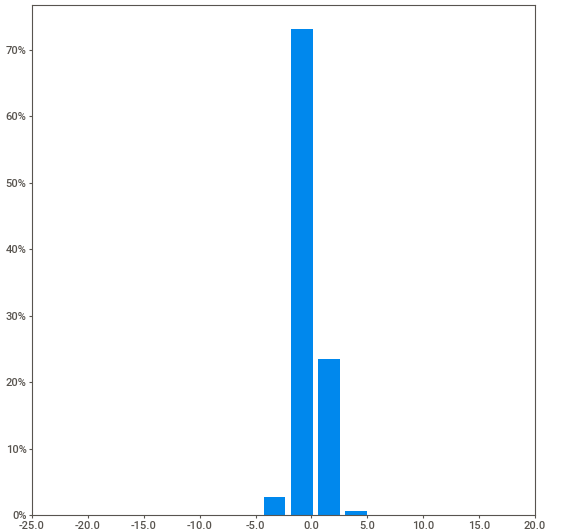
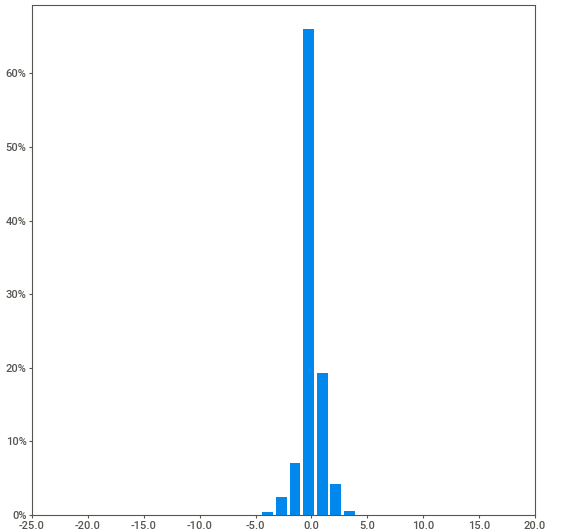
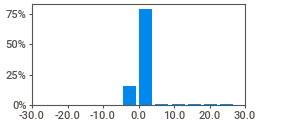
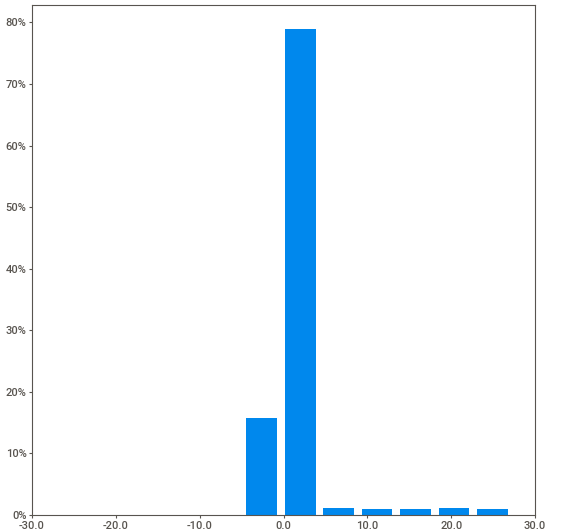
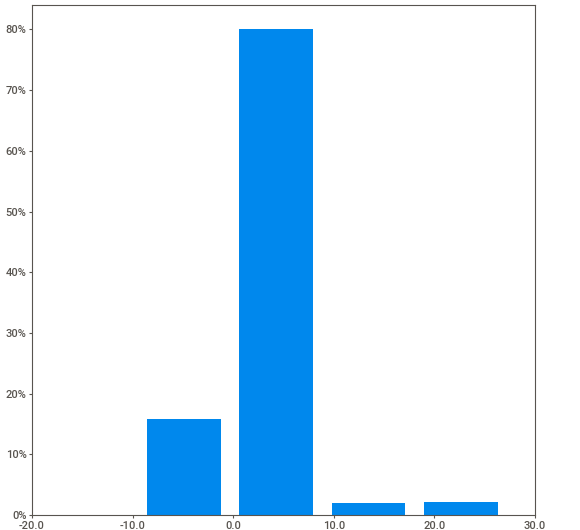
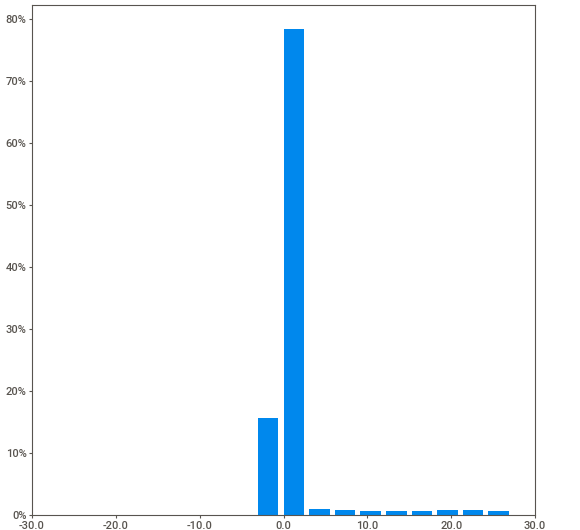
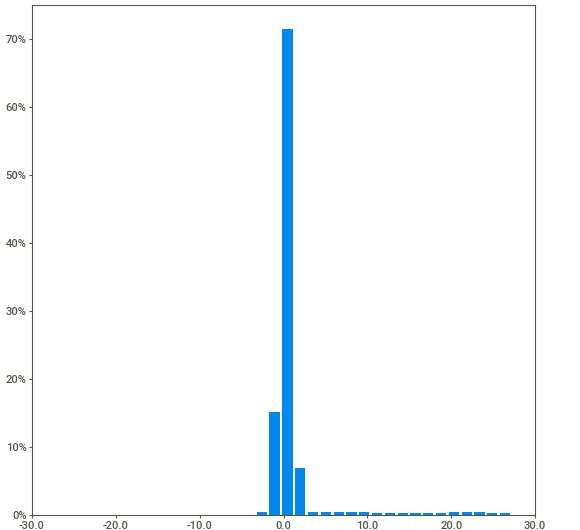
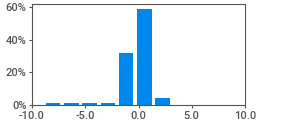
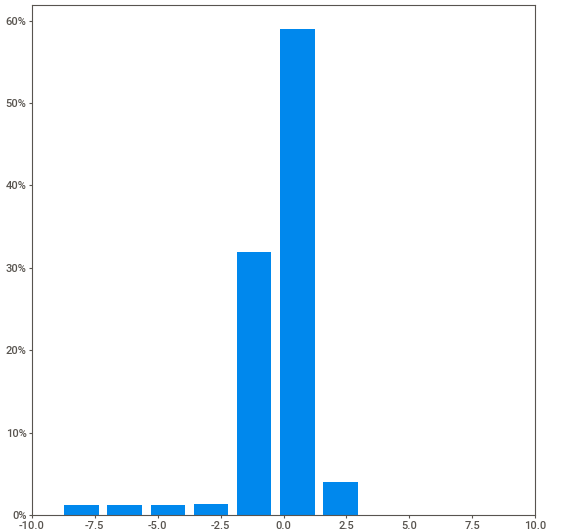
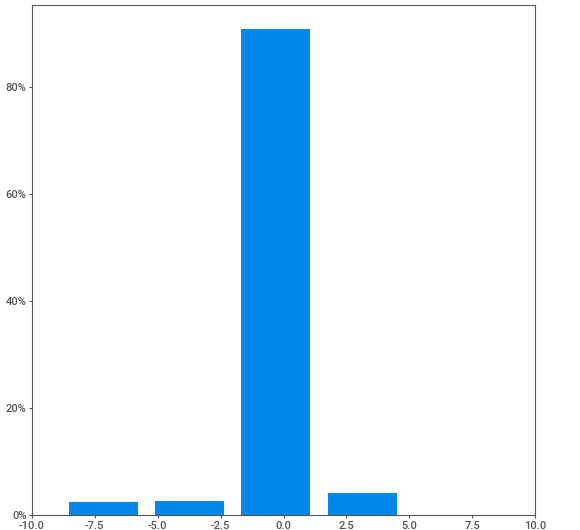
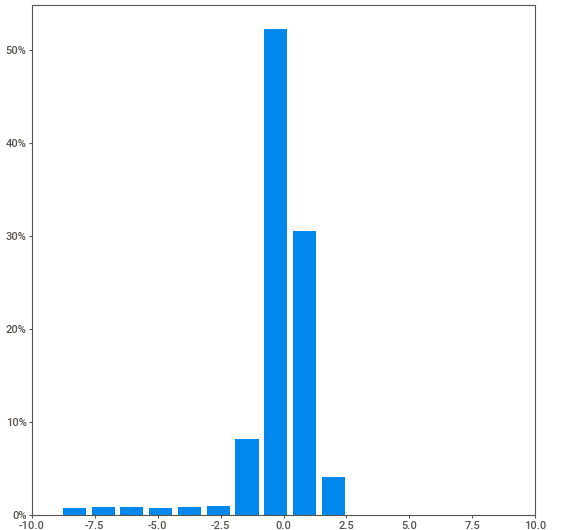
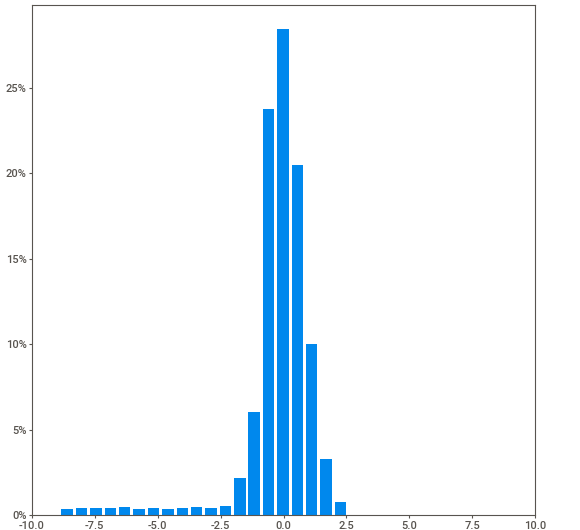
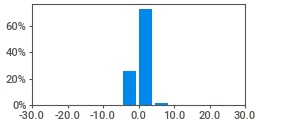
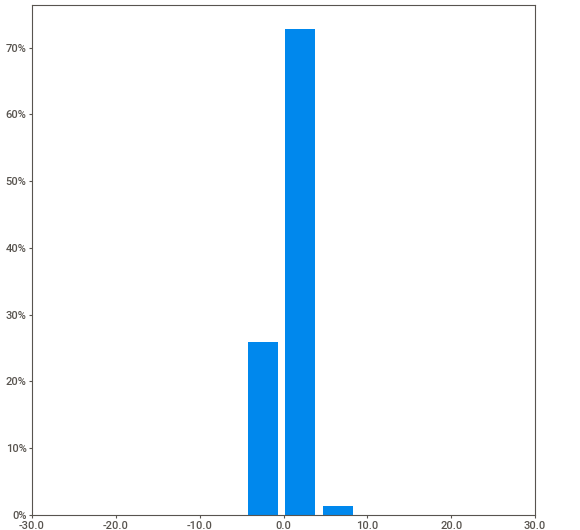
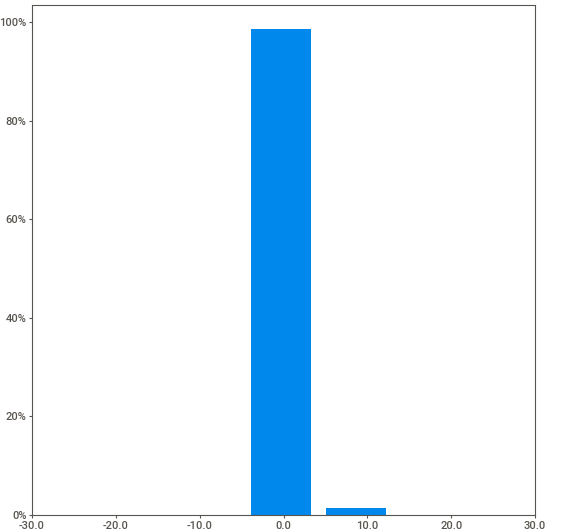
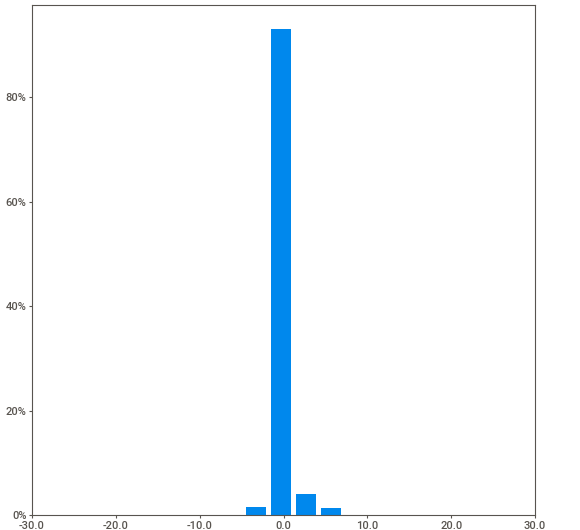
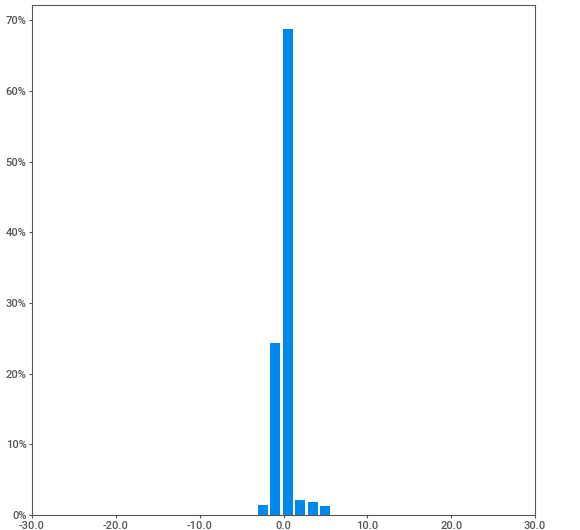
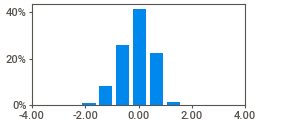
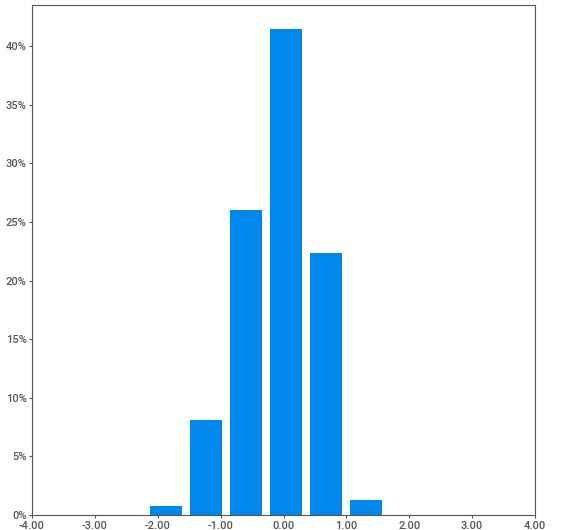
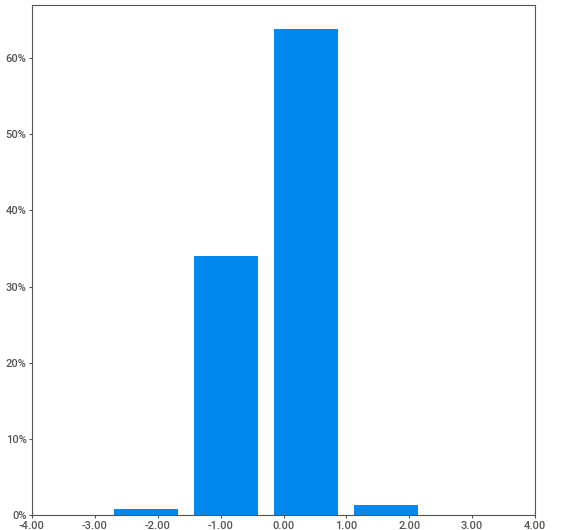
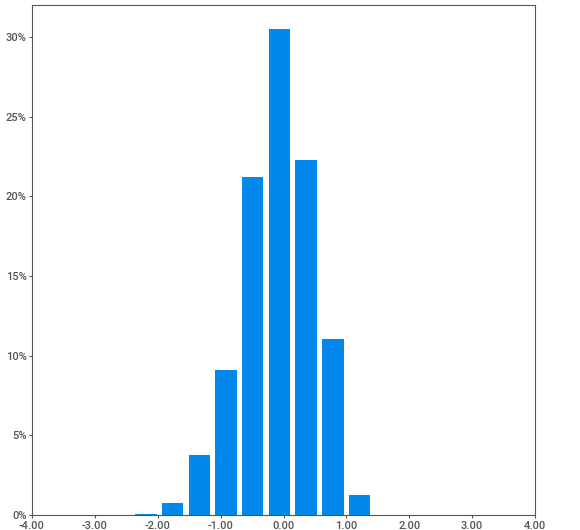
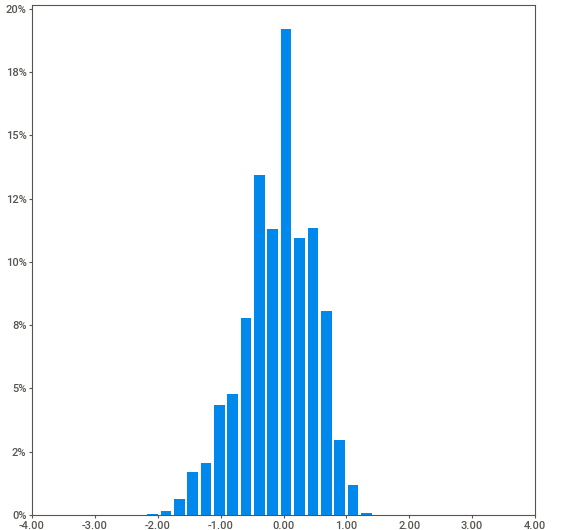
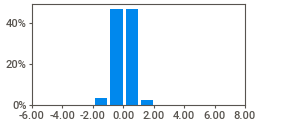
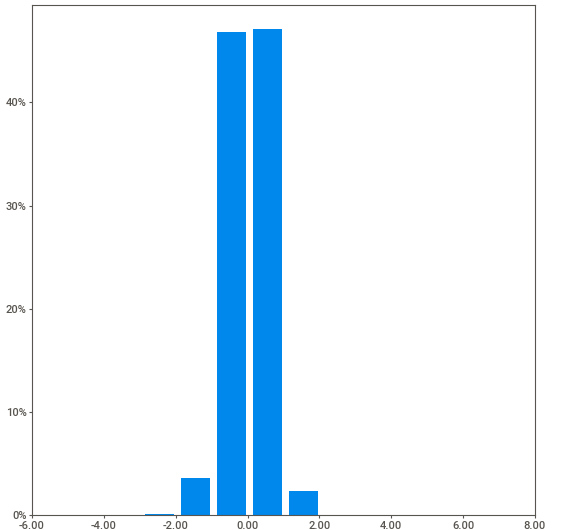
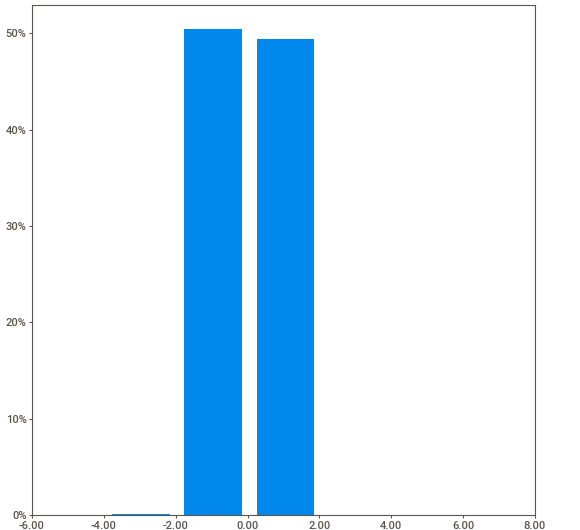
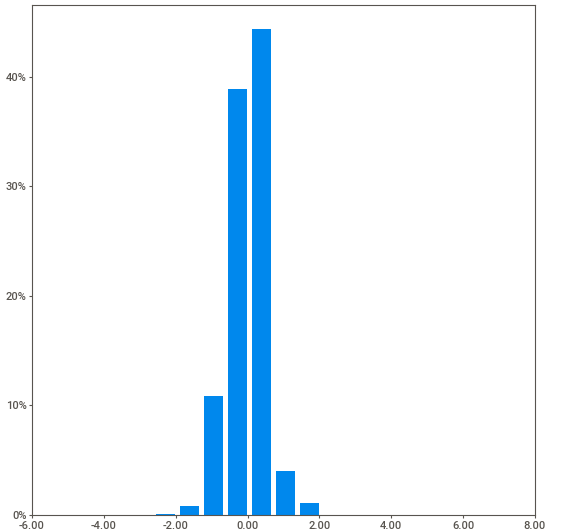
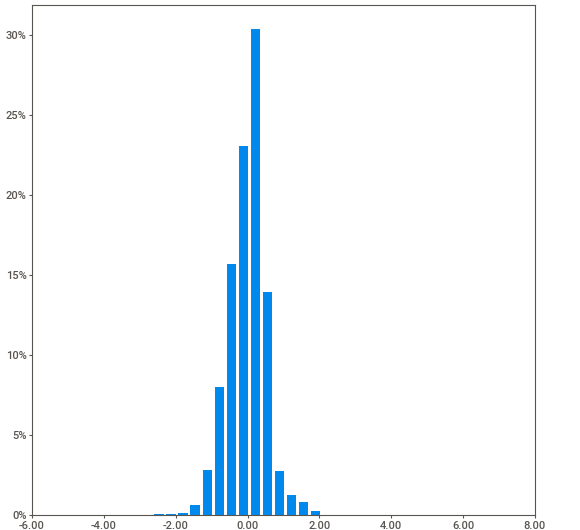
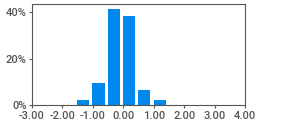
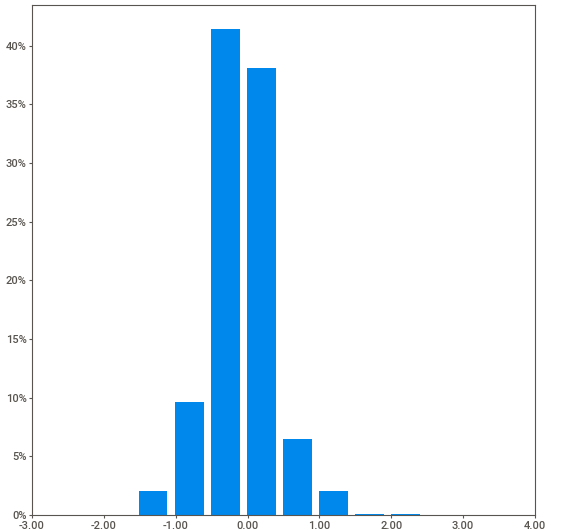
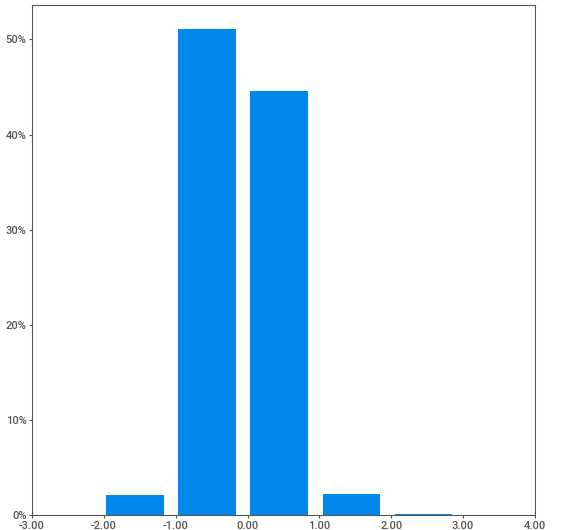
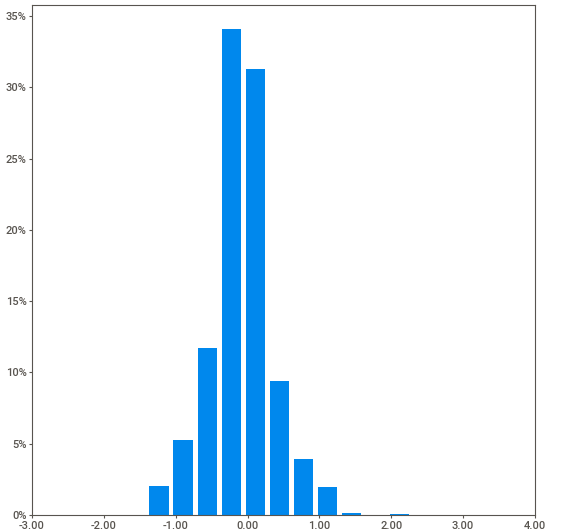
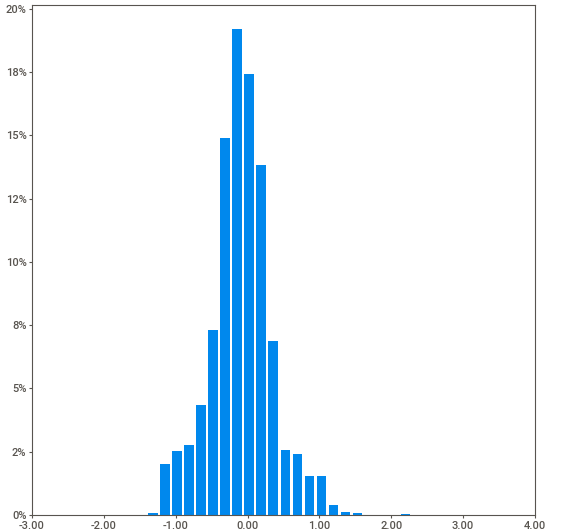
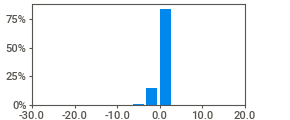
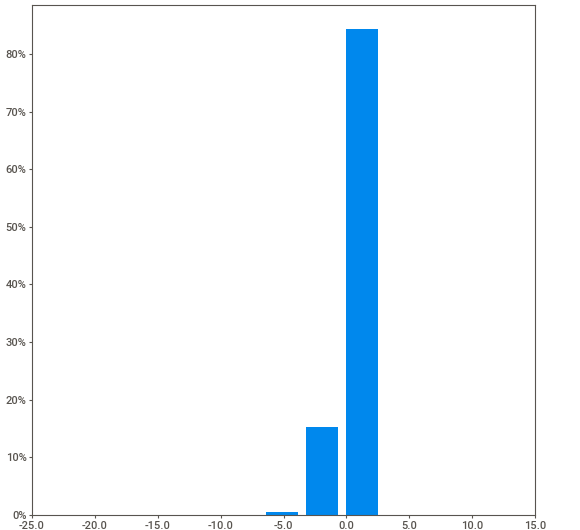
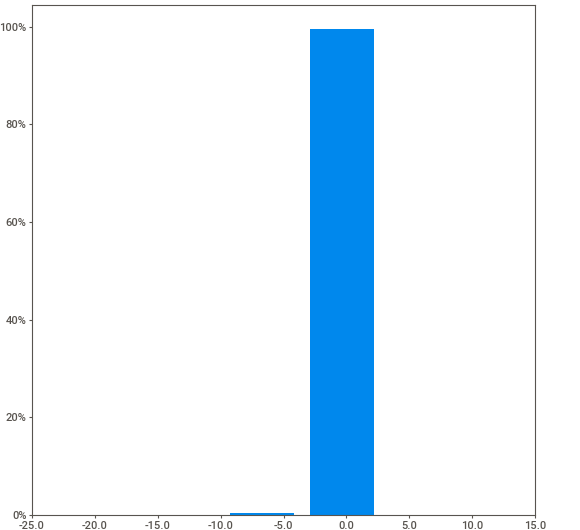
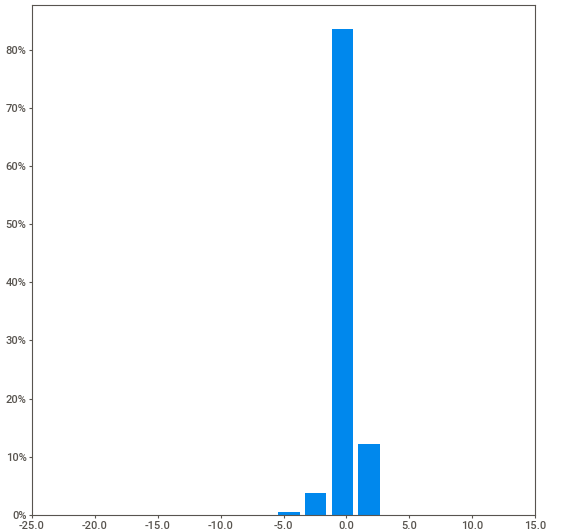
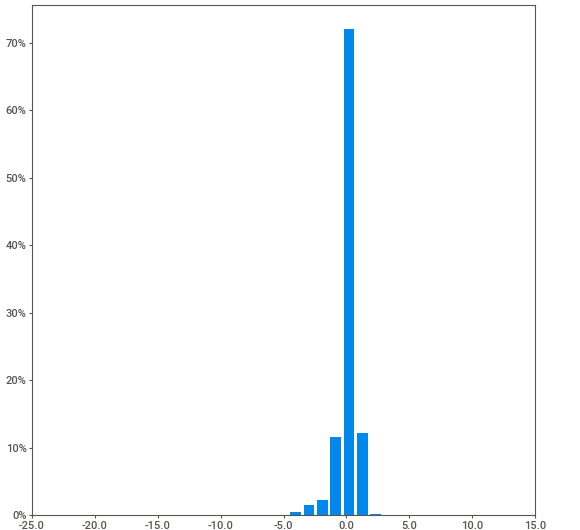
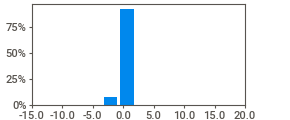
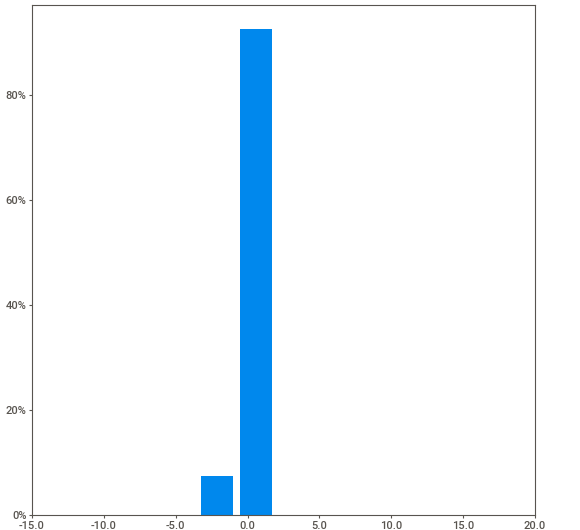
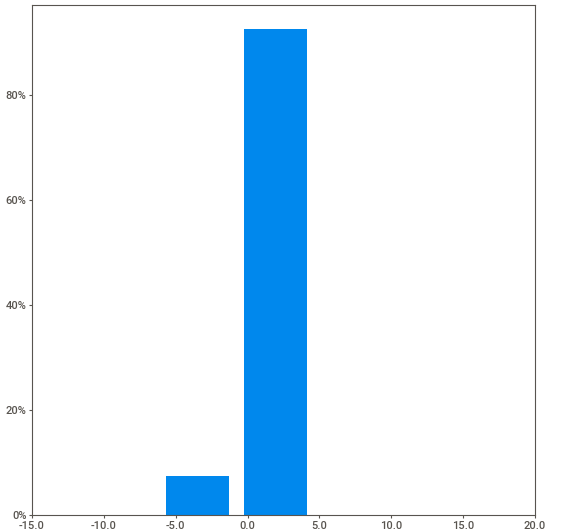
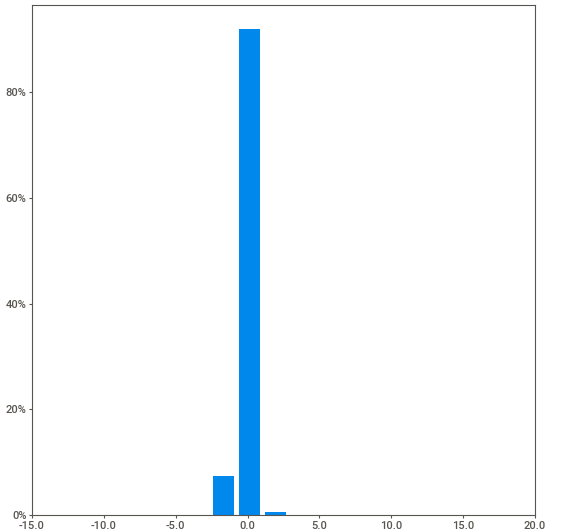
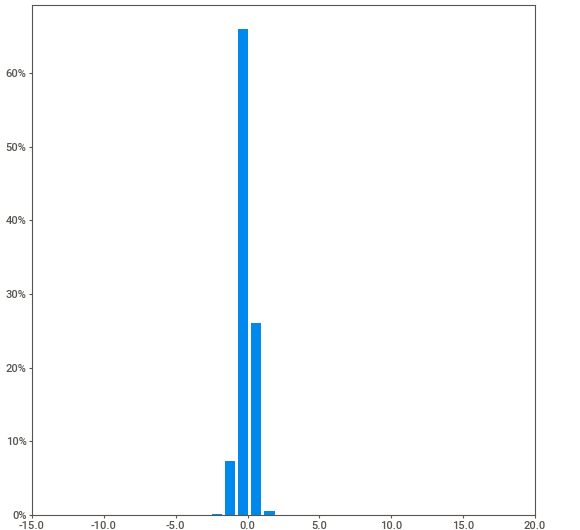
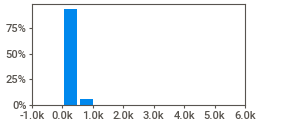
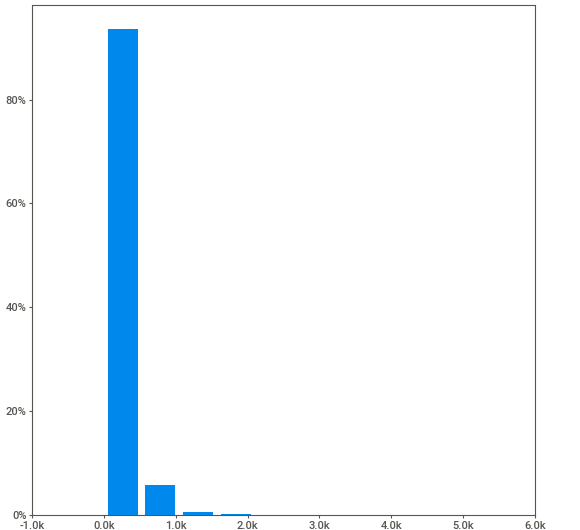
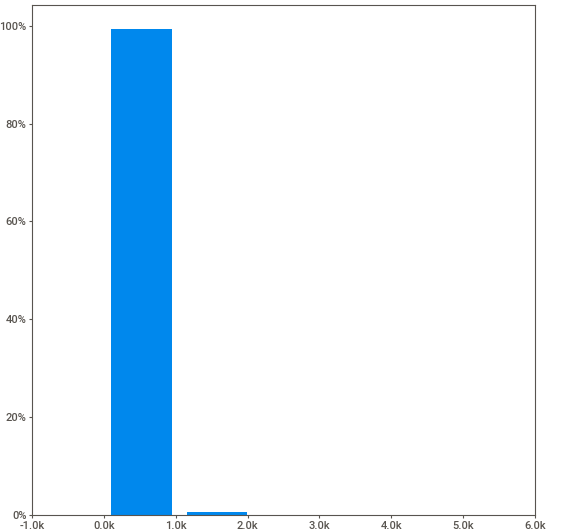
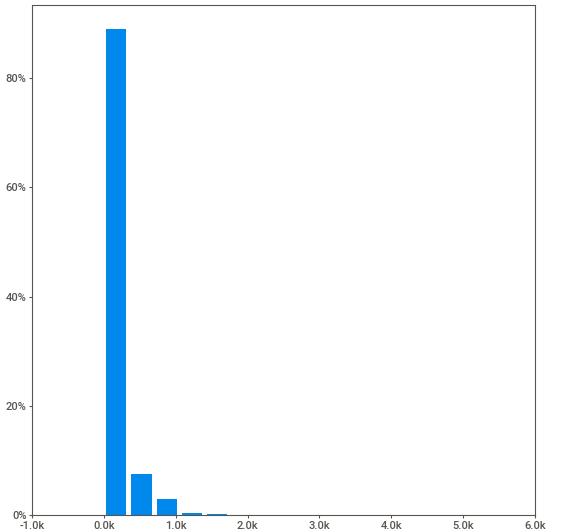
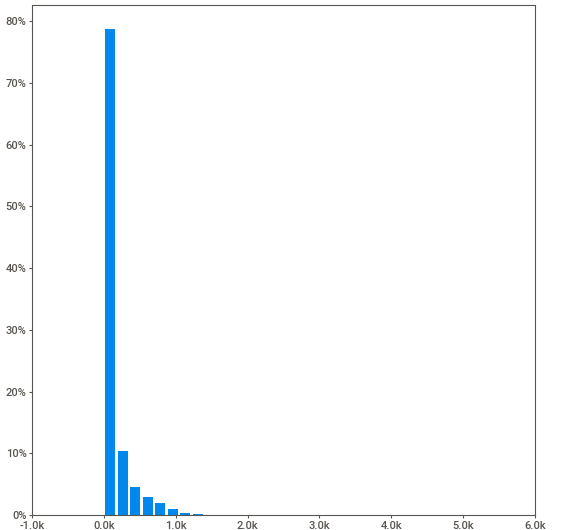
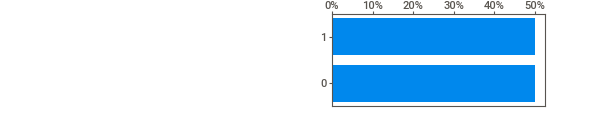
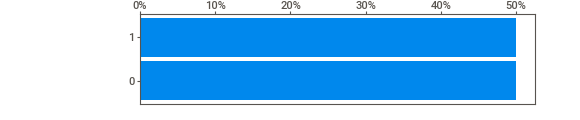
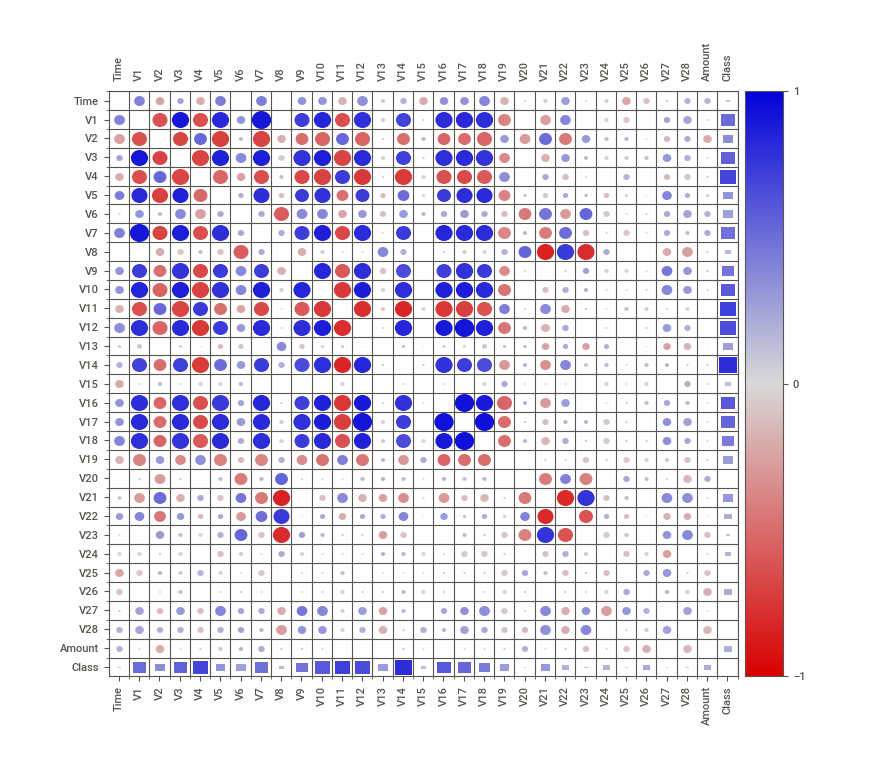
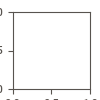

In [27]:
# Visualizing the Detailed Reports:
report.show_notebook()

In [28]:
# Detailed DataFrame Information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31958 entries, 0 to 31957
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    31958 non-null  float64
 1   V1      31958 non-null  float64
 2   V2      31958 non-null  float64
 3   V3      31958 non-null  float64
 4   V4      31958 non-null  float64
 5   V5      31958 non-null  float64
 6   V6      31958 non-null  float64
 7   V7      31958 non-null  float64
 8   V8      31958 non-null  float64
 9   V9      31958 non-null  float64
 10  V10     31958 non-null  float64
 11  V11     31958 non-null  float64
 12  V12     31958 non-null  float64
 13  V13     31958 non-null  float64
 14  V14     31958 non-null  float64
 15  V15     31958 non-null  float64
 16  V16     31958 non-null  float64
 17  V17     31958 non-null  float64
 18  V18     31958 non-null  float64
 19  V19     31958 non-null  float64
 20  V20     31958 non-null  float64
 21  V21     31958 non-null  float64
 22

Dataset got no missing value as all feature possess 284807 (maximum)

There are duplicates in the dataset, which is okay to retain because several transactions may be executed by one creditcard at same amount and time. Hence, is safe to retain duplicates to avoid removing important features.

In [29]:
# Converting the 'Time' Column to the proper datatype:

import pandas as pd

# Converting the 'Time' column from float to datetime
df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [30]:
# Visualizing the New dates in the 'Time' Column

df['Time'].sample(15)

14293   1970-01-02 17:14:44.000000000
12184   1970-01-01 06:33:33.000000000
13740   1970-01-02 08:02:44.000000000
11983   1970-01-01 15:53:48.000000000
13666   1970-01-01 22:35:44.000000000
29167   1970-01-01 19:19:09.071914468
10360   1970-01-01 14:13:49.000000000
11751   1970-01-02 16:48:41.000000000
16134   1970-01-02 13:57:12.905482572
29231   1970-01-01 12:30:27.235838400
13084   1970-01-02 11:49:36.000000000
18354   1970-01-01 15:38:32.788181186
12798   1970-01-02 14:51:50.000000000
19200   1970-01-02 15:12:00.611213632
30488   1970-01-02 14:57:26.892035073
Name: Time, dtype: datetime64[ns]

In [31]:
# Decribing the Average Amount Transacted At Specified Time:
print(df[['Time', 'Amount']].describe())

                                Time        Amount
count                          31958  31958.000000
mean   1970-01-02 02:45:14.159660321    124.713057
min              1970-01-01 00:00:00      0.000000
25%    1970-01-01 16:06:20.821938708      4.087434
50%    1970-01-01 22:49:33.607965353     29.000000
75%    1970-01-02 15:14:56.551147708    131.481156
max              1970-01-02 23:59:42   5239.500000
std                              NaN    234.462404


# Sampling only 'n' Set for training and testing purpose using the ML Model to be created

For computation efficiency and time, reducing the Dataset size becomes import from 568630 to about 20000 will be an effective approach building, hyperparameter tuning, training, and evaluating the Model:

In [32]:
import pandas as pd
import numpy as np

# Setting the number of samples (flexible depending on convenience)
n_samples = 20000

# Randomly sample 20,000 rows from the original DataFrame
df2 = df.sample(n=n_samples, random_state=42)

# Reset the index of the new DataFrame
df2 = df2.reset_index(drop=True)

In [33]:
# Printing the Sample Data Shape:

df2.shape

(20000, 31)

In [34]:
df2.sample(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19432,1970-01-02 07:20:05.000000000,-0.702594,0.891724,1.063383,-0.891340,1.107278,-0.620800,1.132888,-0.189259,-0.643577,...,-0.312064,-0.916034,-0.383511,-0.631719,0.622051,0.358217,-0.047488,0.038731,0.890000,0
16794,1970-01-02 20:38:30.000000000,1.891038,-0.902640,-3.514138,-2.278914,0.949645,-1.105390,1.051449,-0.514433,1.233560,...,0.415923,1.053197,-0.516437,-0.113400,1.015302,-0.388990,-0.076526,-0.067849,183.000000,0
15398,1970-01-01 20:04:42.487946423,-7.376732,7.643169,-5.786721,2.718995,-1.694357,2.903983,-10.034202,-20.390491,-0.457152,...,14.735923,-5.172119,2.779655,-0.874606,0.266944,-0.129955,0.746147,0.559777,1.000000,1
18504,1970-01-01 15:57:52.294138144,-1.844825,-0.246900,-2.452389,3.961006,-0.202248,-1.807435,-4.137290,1.192971,-2.017379,...,0.895223,0.053245,-0.187483,-0.008110,0.548940,0.264637,0.784815,0.049210,8.275585,1


# Checking for Classes balance from the sampled set

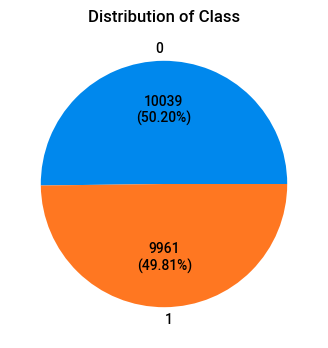

In [35]:
# Checking for imbalanced Dataset after Sampling:
# Visualizing the Class (Fraud and Safe Transaction)
def f1(x):
  total = sum(df2['Class'].value_counts().values)
  val = (x*total)/100
  return '{:.0f}\n({:.2f}%)'.format(val, x)

plt.figure(figsize = (4,4))
# df_without_dup['Cell Phone Access'].value_counts().plot(kind = 'pie', autopct = f1, 
# colormap = 'Wistia')
data = df2['Class'].value_counts()

plt.pie(data, labels = data.index, autopct = f1, textprops= {'fontsize':10})
plt.title('Distribution of Class')
plt.show()

Only 20 Fraudulent Transactions in sampled 12000 Transactions

Looks that fraudulent creditcard transactions are below 2000 transacted amount, above which are outliers.

# Plotting for Heatmap to visualize the pairwise correlation across feature:

# Features Transformation: Encoding and Scaling

In [36]:
# Converting the Time across the two Days into Binary (Day = 1 and Night = 0)
# Time column is in seconds, if not, convert it to seconds
df2['Time'] = (df2['Time'] - df2['Time'].min()).dt.total_seconds()

# Converting the 'Time' to hours
df2['Time_in_hours'] = df2['Time'] / 3600

# Defining the threshold to separate Day (1) and Night (0)
threshold = 18  # 6:00 PM in 24-hour format

# Creating the 'Time_of_day' column based on the threshold
df2['Time_of_day'] = df2['Time_in_hours'].apply(lambda x: 1 if x < threshold else 0)

# Dropping the original 'Time' and 'Time_in_hours' columns
df2 = df2.drop(columns=['Time', 'Time_in_hours'])

In [37]:
# Visualizing Time Classes

df2['Time_of_day'].value_counts()

Time_of_day
0    13848
1     6152
Name: count, dtype: int64

## Creating a list of features' columns to be Transformed

* Note that, Time_of_day and 'Class' Columns are binary (no further transformation required)

In [38]:
# Original List of continuous columns
cat_cols = []
cont_cols = ['V1', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V28', 'Amount']

In [39]:
# Picking only features according the feature importance plot order (tested) to increase the model performance

# Features Dropping: 'V2', 'V5', 'V20', 'V21', 'V22', 'V24', 'V25', 'V27', 'V28', 'Time_of_day'

In [40]:
# Remained List of continuous columns to be transformed and passed into the Model pipeline
cat_cols = []
cont_cols = ['V1', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V23', 'V26', 'Amount']

In [41]:
df2.shape

(20000, 31)

# Encoding and scaling converts feature values into numeric and in a range of 0 and 1 respectively allowing the machine learning more efficient as cannot do so on objects and unscaled values.

Preparing columns for Econding and scaling

In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Create a transformer for one-hot encoding
ohe = OneHotEncoder(sparse=False, drop='first')

# # Create a transformer for scaling by applying MinMaxScaler
sc = MinMaxScaler()
df2[cont_cols] = sc.fit_transform(df2[cont_cols])

# Creating the X, y split from df2

In [43]:
# Creating a big dataset to test out batch inference later:

big_data = df2.sample(160_000, replace=True, ignore_index=True)

print(big_data.shape)
big_data.head()

(160000, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_of_day
0,0.734175,7.721724,0.567307,0.506744,-3.337023,0.585410,0.238213,0.325493,0.303993,0.331039,...,-4.660901,0.567971,-0.338080,0.434417,0.457003,1.040693,0.684676,0.000656,1,1
1,0.908148,0.310386,0.794360,0.264773,0.224715,0.482948,0.542933,0.690794,0.351138,0.411592,...,0.339881,0.501871,0.084160,0.198858,0.561703,0.012009,0.074886,0.011802,0,0
2,0.956439,-1.176494,0.763053,0.325320,-0.605386,0.556159,0.501601,0.700157,0.335888,0.450228,...,0.391305,0.504618,-1.050380,0.094786,0.421960,0.113517,0.029772,0.032271,0,0
3,0.923521,1.048613,0.776513,0.297494,0.228169,0.460619,0.543092,0.688552,0.334574,0.426846,...,-0.656969,0.504111,-0.059952,-0.153184,0.464771,0.239344,0.084410,0.001035,0,1
4,0.798348,-2.339290,0.618004,0.451859,-2.040639,0.500400,0.441205,0.718768,0.311205,0.319220,...,0.979685,0.489684,-1.335957,-0.226406,0.459552,1.017502,-0.772555,0.128620,1,0


In [44]:
# Redefining the Dataframe Name
df = big_data

In [45]:
print(df.columns)
print()
print(df.shape)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Time_of_day'],
      dtype='object')

(160000, 31)


In [46]:
# Split out Training and testing datasets:
from sklearn.model_selection import train_test_split

# Creating train test sets split:

df_train, df_test = train_test_split(df, test_size=0.4, random_state=42)

In [47]:
df_train.shape

(96000, 31)

In [48]:
df_test.shape

(64000, 31)

## Dropping the less importance features according the feature importance plot order (tested) to increase the model performance: 'V5', 'V20', 'V21', 'V22', 'V25', 'V27', 'V28', 'Time_of_day'

In [49]:
# from sklearn.model_selection import train_test_split
# For X_train
X_train = df_train.drop(['Class', 'V2', 'V5', 'V20', 'V21', 'V22', 'V24', 'V25', 'V27', 'V28', 'Time_of_day'], axis=1)

# For y_train
y_train = df_train['Class']

# For X_test
X_test = df_test.drop(['Class','V2', 'V5', 'V20', 'V21', 'V22', 'V24', 'V25', 'V27', 'V28', 'Time_of_day'], axis=1)

# For y_test

y_test = df_test['Class']

In [50]:
X_train.shape

(96000, 20)

In [51]:
y_train.shape

(96000,)

In [52]:
X_test.shape

(64000, 20)

In [53]:
y_test.shape

(64000,)

# Creating a processor from the ClumnTransformer method to ensure all features are included.

In [54]:
from sklearn.compose import ColumnTransformer
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', sc, cont_cols),
        ('Categorical', ohe, cat_cols)
    ],
    remainder='passthrough'
)

# Building an Extreme Gradient Boost (XGBoost) Model

Installing the XGBoost Library

In [55]:
!pip install xgboost

In [56]:
from xgboost import XGBClassifier

# Building the XGBoost model
xgb_classifier = XGBClassifier()

In [57]:
from sklearn.pipeline import Pipeline
# Build the pipeline
pipeline_xgb_model = Pipeline(steps=[
    ('Preprocessor', preprocessor),
    ('XGBoost Model', xgb_classifier)
])

In [58]:
import joblib

# Save the pipeline
joblib.dump(pipeline_xgb_model, 'xgboost_pipeline.pkl')

['xgboost_pipeline.pkl']

In [59]:
# Print the pipeline
print(pipeline_xgb_model)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['V1', 'V3', 'V4', 'V6', 'V7',
                                                   'V8', 'V9', 'V10', 'V11',
                                                   'V12', 'V13', 'V14', 'V15',
                                                   'V16', 'V17', 'V18', 'V19',
                                                   'V23', 'V26', 'Amount']),
                                                 ('Categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [])])),
                ('XGBoost Model',
                 XGBClassifier(base_score=None, booster=N...
                               feature_types=None, gamma=None, 

Based on model feature importance, a few features dropped to check if the model performance metrics will improve:

In [60]:
# Fit the model pipeline
pipeline_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['V1', 'V3', 'V4', 'V6', 'V7',
                                                   'V8', 'V9', 'V10', 'V11',
                                                   'V12', 'V13', 'V14', 'V15',
                                                   'V16', 'V17', 'V18', 'V19',
                                                   'V23', 'V26', 'Amount']),
                                                 ('Categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [])])),
                ('XGBoost Model',
                 XGBClassifier(base_score=None, booster=N...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## Printing the Training Accuracy

In [61]:
from sklearn.metrics import accuracy_score

# Predict on the training set
y_train_pred = pipeline_xgb_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
accuracy = round(train_accuracy*100,)

# Print the training accuracy
print(f"Training Accuracy: {accuracy}%")


Training Accuracy: 100%


Accuracy: 100%


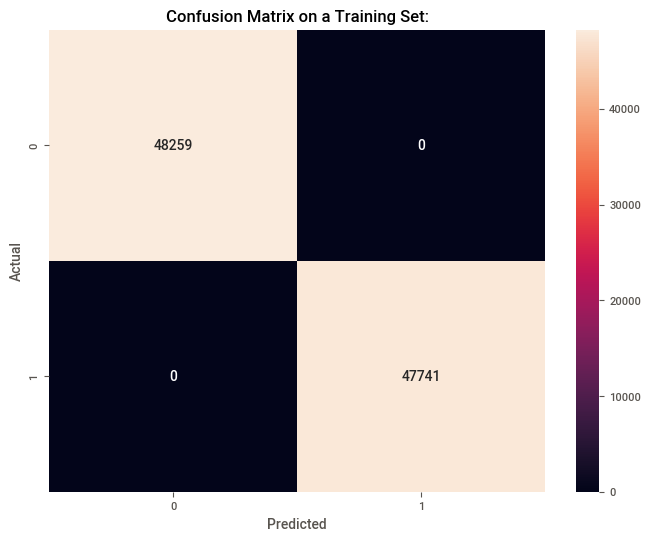

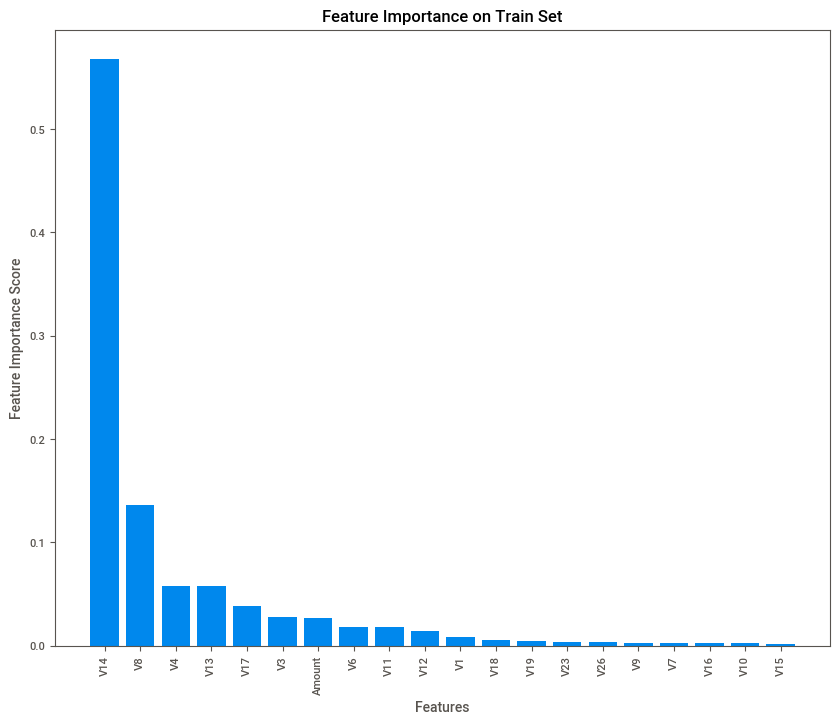


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48259
           1       1.00      1.00      1.00     47741

    accuracy                           1.00     96000
   macro avg       1.00      1.00      1.00     96000
weighted avg       1.00      1.00      1.00     96000



In [62]:
from sklearn.metrics import confusion_matrix, classification_report

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_model.predict(X_train)

# Calculating Model Accuracy
accuracy = round(accuracy_score(y_train, y_train_pred)*100)
print(f"Accuracy: {accuracy}%")

# Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on a Training Set:")
plt.show()

# Plot feature importance for the model on Train Set:
importances = xgb_classifier.feature_importances_
sorted_idx = importances.argsort()[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance on Train Set')
plt.show()

# Classification Report
class_report = classification_report(y_train, y_train_pred)
print("\nClassification Report:")
print(class_report)

## Printing Classes Actual and Predicted with Respective Probabilities

In [63]:
# Predicting classes and probabilities
y_train_pred = pipeline_xgb_model.predict(X_train)
y_train_pred_proba = pipeline_xgb_model.predict_proba(X_train)

# Creating a DataFrame to compare predictions with actual classes
result_df = pd.DataFrame({
    "Actual_Class": y_train,
    "Predicted_Class": y_train_pred,
    "Training Class Probability": y_train_pred_proba[:, 0],
})

# Printing Classes and respective Probabilities

print("Actual Class:")
y_train_list = y_train.values.tolist()
print(*y_train_list[:8])
print()
print("Predicted Class:")
print(*y_train_pred[:8])
print()
print("Training Classes and Respective Probabilities:\n")
# Print the DataFrame
print(result_df.head(8))

Actual Class:
[1, 0, 1, 0, 0, 0, 1, 1]

Predicted Class:
[1 0 1 0 0 0 1 1]

Training Classes and Respective Probabilities:

        Actual_Class  Predicted_Class  Training Class Probability
25029              1                1                    0.000090
91278              0                0                    0.999998
153373             1                1                    0.000085
37509              0                0                    0.999997
104406             0                0                    0.999931
24052              0                0                    0.999988
147672             1                1                    0.000003
109370             1                1                    0.000039


# Applying Hyperparameter for Model Fine-Tuning to find out whether improvements are possible 

** It's important to note that the above model performance metrics are convincingly good for the model to be deployed as it also meet the provided Project Accuracy Threshold of 75%. Hence, this step trying to fine tune the model aims at demonstrating how the processed performed.

Hyperparamenter Tuning

In [64]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import xgboost as xgb
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import GridSearchCV

# # Define a parameter grid for Grid Search
# parameter_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'lambda': [0.0, 0.8, 1.0],
#     'alpha': [0.0, 0.8, 1.0], 
# }

# # Create a Grid Search object
# grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=parameter_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# # Fit the Grid Search to the training data
# grid_search.fit(X_train, y_train)

# # Get the best model from the Grid Search
# best_model = grid_search.best_estimator_

# Model Performance Metrics and Features Importance

In [65]:
# # Make predictions on the test set using the best model
# y_pred = best_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Generate a confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # Print the classification report
# class_report = classification_report(y_test, y_pred)
# print("Classification Report:\n", class_report)

# # Set feature names for XGBoost (for the best_model)
# best_model.get_booster().feature_names = list(X_train.columns)

# # Plot feature importance for the best model on Train Set
# importances = best_model.feature_importances_
# sorted_idx = importances.argsort()[::-1]
# feature_names = X_train.columns

# # Plot feature importance for the best model on Test Set
# importances = best_model.feature_importances_
# sorted_idx = importances.argsort()[::-1]
# feature_names = X_test.columns

# plt.figure(figsize=(10, 8))
# plt.bar(range(X_train.shape[1]), importances[sorted_idx])
# plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Feature Importance Score')
# plt.title('Feature Importance on Train Set')
# plt.show()

# plt.figure(figsize=(10, 8))
# plt.bar(range(X_test.shape[1]), importances[sorted_idx])
# plt.xticks(range(X_test.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Feature Importance Score')
# plt.title('Feature Importance on Test Set')
# plt.show()

# Model Performance Interpretation after Applying Hyperparameter Fine-tuning

* From the Confusion matrix plot, prediction errors happened.
* Classification Report demonstrates consistently the predictive error with confusion matrix as Recall, F1-Score, and Accuracy dropped to 98%, 99%, and 99% respectively.
* Feauture importance plot prioritized V14 instead of V12, changing slighly the order of feature importance. Better to retain the model without applying hyperparameters fine tuning as consistently predicted every aspect at 100%.

# Final Model Performance Metrics

# Retaining the First Model before Hyperparameter Fine-tuning

Accuracy: 100%


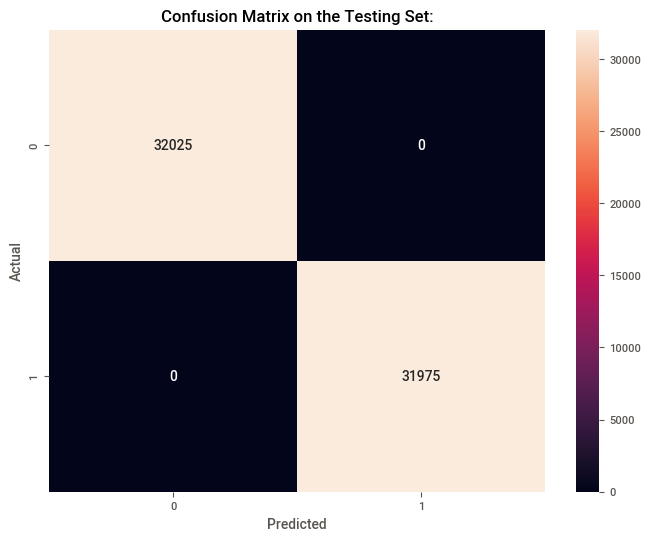

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32025
           1       1.00      1.00      1.00     31975

    accuracy                           1.00     64000
   macro avg       1.00      1.00      1.00     64000
weighted avg       1.00      1.00      1.00     64000



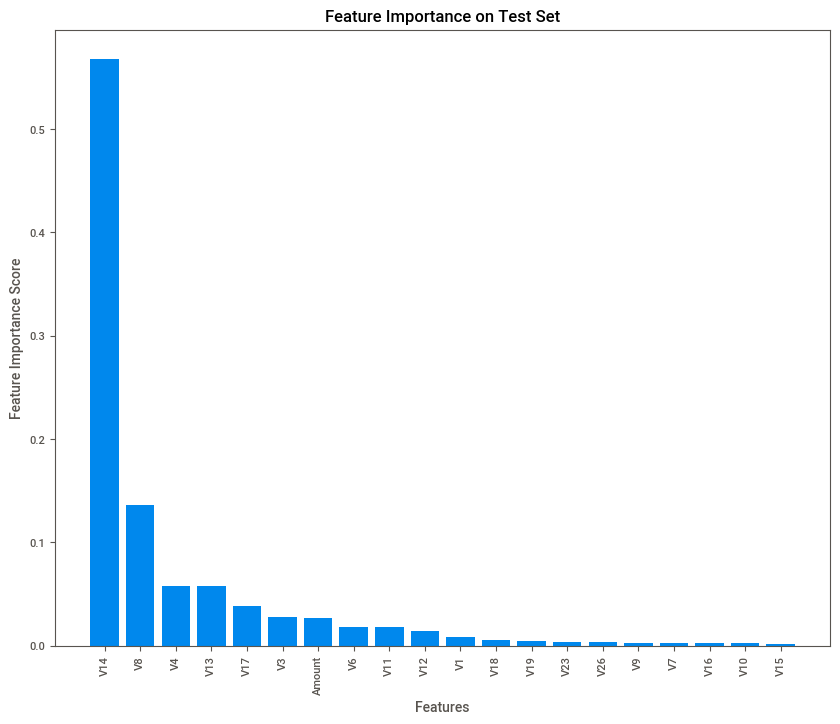

In [66]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = pipeline_xgb_model.predict(X_test)
y_pred

# Calculating Model Accuracy
accuracy = round(accuracy_score(y_test, y_pred)*100)
print(f"Accuracy: {accuracy}%")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on the Testing Set:')
plt.show()

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Plot feature importance for the model on Test Set:
importances = xgb_classifier.feature_importances_
sorted_idx = importances.argsort()[::-1]
feature_names = X_test.columns

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), importances[sorted_idx])
plt.xticks(range(X_test.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance on Test Set')
plt.show()

## Testing If Model Performance Metrics (Accuracy > 75%

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

# From the Classification report:
class_rep = classification_report(y_test, y_pred, output_dict=True)

# Extracting relevant metrics
precision = class_rep["1"]["precision"]
recall = class_rep["1"]["recall"]
f1_score = class_rep["1"]['f1-score']
accuracy = class_rep["accuracy"]

# Metrics as per the Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print()
print("MODEL PERFORMANCE METRICS:\n")

# Creating a Function to interpret metrics
def interpret_metric(metric, threshold, metric_name):
    if metric > threshold:
        print(f"""
              {metric_name} ({metric*100:.0f}%) is above {threshold * 100}%: making the model excellent in predicting nature of transactions!
              """
             )
    else:
        print(f"{metric_name} ({metric*100:.0f}%) is below {threshold * 100}% - Needs improvement.")

# Defining a threshold (predefined at >0.75) for Model Accuracy:
threshold = 0.75

# Interpretation of precision
interpret_metric(precision, threshold, "Precision")

# Interpretation of recall
interpret_metric(recall, threshold, "Recall")

# Interpretation of F1-score
interpret_metric(f1_score, threshold, "F1-Score")

# Interpretation of model accuracy
if accuracy > threshold:
    print(f"Model accuracy of: ({accuracy*100:.0f}%) is above {threshold * 100}%, meaning that the Model is performing well.")
else:
    print(f"Model accuracy ({accuracy*100:.0f}%) is below {threshold * 100}%, Model accuracy should be improved.")

# Summary statement about model performance
if tp > 0:
    print("""
          The model correctly identifies fraudulent transactions (True Positives) as demonstrated by
          high precision.
          """
         )
else:
    print("The model does not identify any fraudulent transactions (True Positives) - Further improvement is needed.")


MODEL PERFORMANCE METRICS:


              Precision (100%) is above 75.0%: making the model excellent in predicting nature of transactions!
              

              Recall (100%) is above 75.0%: making the model excellent in predicting nature of transactions!
              

              F1-Score (100%) is above 75.0%: making the model excellent in predicting nature of transactions!
              
Model accuracy of: (100%) is above 75.0%, meaning that the Model is performing well.

          The model correctly identifies fraudulent transactions (True Positives) as demonstrated by
          high precision.
          


# Fraud Predictions: Actual Vs Predicted Classes with respective probabilities:

In [68]:
# Predicting classes and probabilities
y_pred = pipeline_xgb_model.predict(X_test)
y_pred_proba = pipeline_xgb_model.predict_proba(X_test)

# Creating a DataFrame to compare predictions with actual classes
result_df = pd.DataFrame({
    "Actual_Class": y_test,
    "Predicted_Class": y_pred,
    "Test Class Probability": y_pred_proba[:, 0],
})

# Printing Classes and respective Probabilities
print("Actual Class:")
y_test_list = y_test.values.tolist()
print(y_test_list[:8])
print()
print("Predicted Class:")
print(y_pred[:8])
print()
print("Test Classes and Respective Probabilities:\n")
# Print the DataFrame
print(result_df.head(8))

Actual Class:
[0, 1, 0, 1, 0, 0, 1, 1]

Predicted Class:
[0 1 0 1 0 0 1 1]

Test Classes and Respective Probabilities:

        Actual_Class  Predicted_Class  Test Class Probability
120476             0                0                0.999999
32693              1                1                0.000002
79958              0                0                0.999999
76366              1                1                0.000069
82343              0                0                0.999999
142834             0                0                0.998717
116845             1                1                0.000014
159721             1                1                0.000011


# Notes for Model Metrics Interpretation Summary

Precision:
Precision metric assesses how correctly the model is picking positive predictions by the model as a proportion of true positive predictions out of all positive predictions made by the model. In the context of fraud detection with credit cards, high precision indicates that when the model predicts a transaction as fraudulent, it is highly likely to be correct. A high precision means fewer false alarms, which is important to prevent inconveniencing legitimate customers with false fraud alerts.

Recall:
Recall is a measure of sensitivity or true positive rate, evaluating the model's ability to identify actual positive cases. It measures the proportion of true positive predictions relative to all actual positive cases. In the context of fraud detection, high recall means the model is good at capturing most of the fraudulent transactions, minimizing the number of fraud cases that go undetected. High recall is essential to ensure that fraudulent activities are not missed.

F1-Score:
The F1-Score is a balance between precision and recall. It provides a single value that combines both metrics into a single measure of a model's overall effectiveness predicting correctly. The F1-Score is particularly useful when precision and recall have different priorities. A high F1-Score indicates that the model has both a low rate of false alarms (high precision) and captures a significant proportion of actual fraud cases (high recall). In fraud detection, a high F1-Score signifies a robust model that performs well in balancing precision and recall, making it reliable for identifying fraudulent transactions.

A high F1-Score eliminates the need to choose between emphasizing precision or recall; it indicates that the model is performing well in terms of correctly identifying fraudulent transactions without excessively generating false positives.

In summary, high figures in precision, recall, and the F1-Score are indicative of a well-performing fraud detection model.

# Model Performance Metrics Interpretation and Usability

## Model Performance Metrics:

* Based on the confusion matrix actuals vs predicted perfectly performed as there were zero missed prediction.
* Based on the Classifiction Report: Precision, Recall, F1-Score, and Accuracy are consistently at 100% in line with the confusion matrix visualization.
* V14 feature is the most important in predicting whether transaction fraudulent followed by V12, V7, V4, V17, V3, V8, V1, ... etc. This may help Banks refocus time and resources only on those highly ranked features in predicting likelihood of fraudulent credit card transactions. 
* Focusing on important features lead to time saving and reduced computational complexity (cost saving).

## Model Usability

* High Net Promoter Score (NPS) -- Banks are doing great with far more happy customers than unhappy ones.
* Potential Overall Cost Savings: Using this model by the Bank may save money in preventing fraudulent transactions. It can also improve customer satisfaction by reducing the number of legitimate transactions incorrectly flagged as fraudulent.
* Model Resilience and reliability. This model may maintain its fraudulent predictive power (performance) on unseen data, which is important in a real-world setting where  transactions distribution changes over time. Hence, increased demand for the credit cards services.
* Monitoring and Adaptation: Even with a high-performing model, it's essential to continuously monitor its performance and adapt it as needed. Fraudsters can change their tactics, and the model should be updated to address evolving threats related to creditcards' transactions.
* Customer Communication: In the banking domain, clear communication with customers is essential. Customers should be informed about the bank's fraud detection methods and how they can protect themselves. An overzealous fraud detection system may sometimes lead to customer inconvenience.
* Marketing Strategy: The bank may use the high-performance model promoting itself as a secure place to conduct financial transactions, emphasizing the commitment to protecting customers from fraud.
* Regulatory Compliance: Ensure that the model complies with relevant regulations and data privacy laws. Transparency in model development and usage is critical.
* Education and Training: Continuously educating and training the Bank employees on how to use and interpret the model results, as well as how to take appropriate actions when fraud is suspected.

## Future Works/projects

* Aspiring to further in more Machine Learning Projects: for both Supervised and Unsupervised facets in Classification related problem statements and application of AI in business setup.
* To start with it would be a great opportunity getting attached to real life business invironment getting to apply and learn more what I already got from this Data Scientist Bootcamp by Knowledgehut upGrad.